# COS 711 - Assignment 2
### Name: Luke Lawon
### Student Number: u21433811
Comparision of gradient-based neural network training algorithms and hyperparameter optimization.


# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import KFold
from scipy import stats
from torch.optim import Optimizer
import seaborn as sns 
import matplotlib.pyplot as plt

# Data Processing Parameters

In [2]:
GLOBAL_TEST_SPLIT = 0.20

# Getting and Exploring the Data


### Basics

Read data from local CSV

In [3]:
df = pd.read_csv('Almond.csv')

Validate first few rows

In [4]:
df.head()

Unnamed: 0  Length (major axis)  Width (minor axis)  Thickness (depth)  \
0           0                  NaN          227.940628         127.759132   
1           1                  NaN          234.188126         128.199509   
2           2                  NaN          229.418610         125.796547   
3           3                  NaN          232.763153         125.918808   
4           4                  NaN          230.150742         107.253448   

      Area   Perimeter  Roundness  Solidity  Compactness  Aspect Ratio  \
0  22619.0  643.813269        NaN  0.973384     1.458265           NaN   
1  23038.0  680.984841        NaN  0.957304     1.601844           NaN   
2  22386.5  646.943212        NaN  0.967270     1.487772           NaN   
3  22578.5  661.227483        NaN  0.965512     1.540979           NaN   
4  19068.0  624.842706        NaN  0.951450     1.629395           NaN   

   Eccentricity    Extent  Convex hull(convex area)   Type  
0           NaN  0.681193                   23237.5  MAMRA  
1           NaN  0.656353                   24065.5  MAMRA  
2           NaN  0.683620                   23144.0  MAMRA  
3           NaN  0.685360                   23385.0  MAMRA  
4           NaN  0.714800                   20041.0  MAMRA

Remove 'Unnamed: 0' column

In [5]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

Length (major axis)  Width (minor axis)  Thickness (depth)     Area  \
0                  NaN          227.940628         127.759132  22619.0   
1                  NaN          234.188126         128.199509  23038.0   
2                  NaN          229.418610         125.796547  22386.5   
3                  NaN          232.763153         125.918808  22578.5   
4                  NaN          230.150742         107.253448  19068.0   

    Perimeter  Roundness  Solidity  Compactness  Aspect Ratio  Eccentricity  \
0  643.813269        NaN  0.973384     1.458265           NaN           NaN   
1  680.984841        NaN  0.957304     1.601844           NaN           NaN   
2  646.943212        NaN  0.967270     1.487772           NaN           NaN   
3  661.227483        NaN  0.965512     1.540979           NaN           NaN   
4  624.842706        NaN  0.951450     1.629395           NaN           NaN   

     Extent  Convex hull(convex area)   Type  
0  0.681193                   23237.5  MAMRA  
1  0.656353                   24065.5  MAMRA  
2  0.683620                   23144.0  MAMRA  
3  0.685360                   23385.0  MAMRA  
4  0.714800                   20041.0  MAMRA

Determine shape

In [6]:
df.shape

(2803, 13)

Determine missing values per column

In [7]:
df.isnull().sum()

Length (major axis)          857
Width (minor axis)           942
Thickness (depth)           1004
Area                           0
Perimeter                      0
Roundness                    857
Solidity                       0
Compactness                    0
Aspect Ratio                1799
Eccentricity                1799
Extent                         0
Convex hull(convex area)       0
Type                           0
dtype: int64

Determine ratio of rows that have the value missing

In [8]:
df.isnull().mean()

Length (major axis)         0.305744
Width (minor axis)          0.336068
Thickness (depth)           0.358188
Area                        0.000000
Perimeter                   0.000000
Roundness                   0.305744
Solidity                    0.000000
Compactness                 0.000000
Aspect Ratio                0.641812
Eccentricity                0.641812
Extent                      0.000000
Convex hull(convex area)    0.000000
Type                        0.000000
dtype: float64

Analyze the 5 number summary of numerical features

In [9]:
df.describe()

Length (major axis)  Width (minor axis)  Thickness (depth)  \
count          1946.000000         1861.000000        1799.000000   
mean            290.609274          171.025915         109.705378   
std              62.719433           29.916529          18.940597   
min             151.335266           88.050529          59.494278   
25%             245.966293          149.453659          97.091682   
50%             279.879883          170.168365         110.280136   
75%             330.508575          190.640427         121.392773   
max             515.352478          258.569794         181.845200   

               Area    Perimeter    Roundness     Solidity  Compactness  \
count   2803.000000  2803.000000  1946.000000  2803.000000  2803.000000   
mean   26511.117374   743.863770     0.470466     0.955828     1.825233   
std    13782.561344   230.632076     0.118673     0.039596     0.794058   
min     6037.000000   311.563489     0.173748     0.718772     1.164469   
25%    16211.500000   571.730009     0.384810     0.944579     1.357398   
50%    23440.500000   707.487369     0.472718     0.970422     1.576412   
75%    33451.000000   878.896530     0.577553     0.981484     1.965953   
max    89282.000000  1864.947387     0.697293     0.992889     9.660057   

       Aspect Ratio  Eccentricity       Extent  Convex hull(convex area)  
count   1004.000000   1004.000000  2803.000000               2803.000000  
mean       1.753216      0.813114     0.724587              27696.218159  
std        0.206616      0.041312     0.047474              14237.347610  
min        1.400082      0.699897     0.454538               6355.000000  
25%        1.612490      0.784476     0.701673              17088.500000  
50%        1.705716      0.810120     0.733720              24589.000000  
75%        1.833339      0.838141     0.757551              34863.250000  
max        2.731251      0.930563     0.845813              90642.500000

### Observations on missing values

We note that for every row, at least one of Length, Width, or Thickness is missing (due to how the 2D photos of the Almonds are taken). We also note that the other features with missing values are Roundness, Aspect Ratio, and Eccentricity. These values are functions of Length, or Length and Width - hence, when the corresponding dimension is missing, these values are null as well. Dropping rows with missing values is not possible, since every row will have at least 1 missing value and the number of missing values in each row is dependant on which dimension is missing (since certain dimensions are used to calculate the derived features.)

#### Investigate relationship between Length and Width

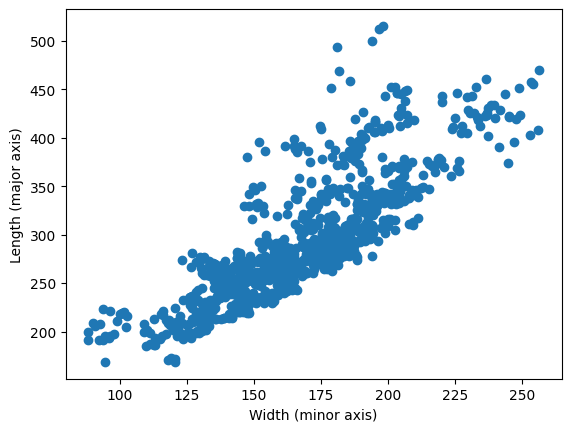

0.8370342985445304


In [10]:
plt.scatter(x=df["Width (minor axis)"], y=df["Length (major axis)"])
plt.xlabel("Width (minor axis)")
plt.ylabel("Length (major axis)")
plt.show()
print(df["Length (major axis)"].corr(df["Width (minor axis)"]))


We see that the correlation coefficient between Length and Width is high, indicating strong linear correlation (we observe this in the scatterplot too).

#### Investigating the ration between Length and Width

count    1004.000000
mean        1.753216
std         0.206616
min         1.400082
25%         1.612490
50%         1.705716
75%         1.833339
max         2.731251
dtype: float64


<Axes: >

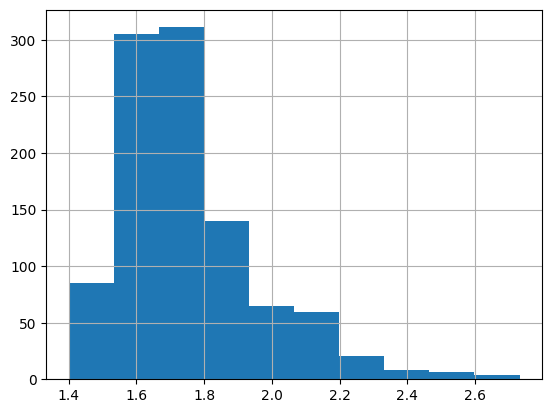

In [11]:
length_width = df["Length (major axis)"] / df["Width (minor axis)"]
print(length_width.describe())
length_width.hist()

In [12]:
print("Coefficient of variation: ", length_width.std() / length_width.mean())

Coefficient of variation:  0.11784988230028316


We note that, the ratio of the Length to the Width is somewhat skewed to the right, however, the coefficient of variation of this ratio is small, indicating that it has little variability in general. 

#### Investigate Distribution of Thickness

count    1799.000000
mean      109.705378
std        18.940597
min        59.494278
25%        97.091682
50%       110.280136
75%       121.392773
max       181.845200
Name: Thickness (depth), dtype: float64


<Axes: >

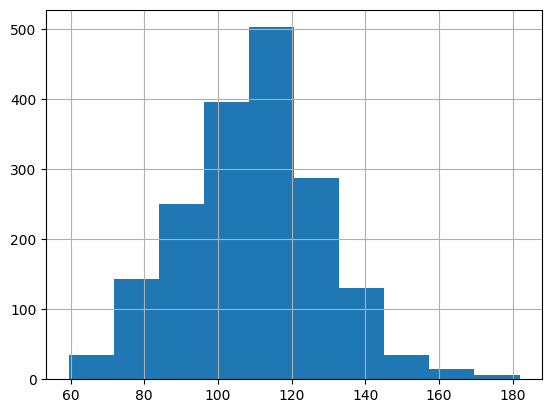

In [13]:
print(df["Thickness (depth)"].describe())
df["Thickness (depth)"].hist()

The Thickness is somewhat normally distributed

#### Investigate relationship between Thickness and Length, and Thickness and Width

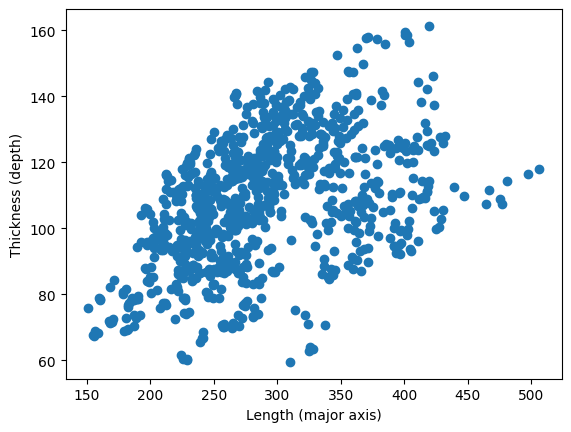

0.457854311187848


In [14]:
plt.scatter(x=df["Length (major axis)"], y=df["Thickness (depth)"])
plt.xlabel("Length (major axis)")
plt.ylabel("Thickness (depth)")
plt.show()
print(df["Length (major axis)"].corr(df["Thickness (depth)"]))


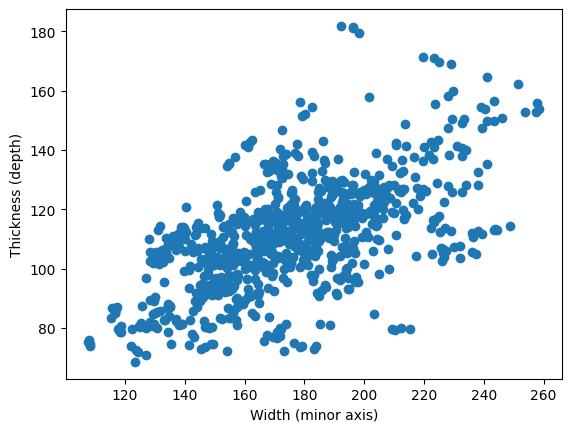

0.5946214999916976


In [15]:
plt.scatter(x=df["Width (minor axis)"], y=df["Thickness (depth)"])
plt.xlabel("Width (minor axis)")
plt.ylabel("Thickness (depth)")
plt.show()
print(df["Width (minor axis)"].corr(df["Thickness (depth)"]))


We observe above that there is not a strong (linear) correlation between the Length or Width of the Almond and its thickness.

### Function to Split the Data into train-test sets with class balancing

In [16]:
SEED_FOR_INITIAL_SPLIT = 42

def spilt_into_train_test(X, y, test_split=0.25):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_split, stratify=y, shuffle=True, 
                                                        random_state=SEED_FOR_INITIAL_SPLIT)
    return X_train, X_test, y_train, y_test


# Preprocessing the Data

## Imputation Strategy

Since some features are derived from the Length and Widths dimensions of the almond (Roundness, Aspect Ratio, and Eccentricity), we will impute the missing dimension where necessary and use the formulae on the Kaggle data card to determine the relevant missing derived feature(s). 

To impute Length and Width: In the above, section, we observed that Length and Width have a strong linear correlation and that the ratio between them has little variability across observations. This makes it a good candidate for a simple linear regression model that uses one dimension to predict the other. We will use fit a simple linear regression model that uses the Width as 'X' and the Length and 'y' using the observations where just the Thickness is missing (which is a sizable 35% of the dataset - approximately 1000 observations in full data set), and then use that model to infer the missing Length or Width value for other observations.

To impute Thickness: In the above section we found no strong relationship between Thickness and any of the other two dimensions, however, the Thickness is somewhat normally distributed. We will impute the thickness using the median thickness.

Finally, all imputation is done relative to the training dataset, and then artifacts obtained (model and median) and then applied to the test dataset such to ensure consistent scaling and prevent information leakage.

In [17]:
def helper_get_missing_dimension_indices(df_train_data: pd.DataFrame, df_test_data: pd.DataFrame):
    # Get all the indices where the Thickness is missing (training and test data)
    missing_thickness_indices_train = df_train_data[df_train_data['Thickness (depth)'].isnull()].index
    missing_thickness_indices_test = df_test_data[df_test_data['Thickness (depth)'].isnull()].index
    
    # Get all the indices where the Length is missing (training and test data)
    missing_length_indices_train = df_train_data[df_train_data['Length (major axis)'].isnull()].index
    missing_length_indices_test = df_test_data[df_test_data['Length (major axis)'].isnull()].index
    
    # Get all the indices where the Width is missing (training and test data)
    missing_width_indices_train = df_train_data[df_train_data['Width (minor axis)'].isnull()].index
    missing_width_indices_test = df_test_data[df_test_data['Width (minor axis)'].isnull()].index
    
    
    return missing_thickness_indices_train, missing_thickness_indices_test, \
        missing_length_indices_train, missing_length_indices_test, \
                missing_width_indices_train, missing_width_indices_test

In [18]:
def helper_fit_simple_linear_regression_model(X, y):
    model = LinearRegression()
    model.fit(X, y)
    return model

In [19]:
def helper_reverse_simple_linear_regression_model(model, y):
    return (y - model.intercept_) / model.coef_[0]

In [20]:
def helper_impute_length_and_width(df_train_data: pd.DataFrame, df_test_data: pd.DataFrame):
    # Use hlper function to get missing indices of each dimension
    missing_thickness_indices_train, missing_thickness_indices_test, \
            missing_length_indices_train, missing_length_indices_test, \
                    missing_width_indices_train, missing_width_indices_test = \
                            helper_get_missing_dimension_indices(df_train_data, df_test_data)
    
    # Fit a Simple Linear Regression model using Width as 'X' and Length as 'y'
    lengths = df_train_data.loc[missing_thickness_indices_train, "Length (major axis)"]
    widths = df_train_data.loc[missing_thickness_indices_train, "Width (minor axis)"]
    LENGTH_WIDTH_MODEL = helper_fit_simple_linear_regression_model(widths.values.reshape(-1, 1), lengths)
    
    # Impute Length and Width for missing values in training data
    df_train_data.loc[missing_length_indices_train, "Length (major axis)"] = \
        LENGTH_WIDTH_MODEL.predict(df_train_data.loc[missing_length_indices_train, "Width (minor axis)"].values.reshape(-1, 1))
    df_train_data.loc[missing_width_indices_train, "Width (minor axis)"] = \
            helper_reverse_simple_linear_regression_model(LENGTH_WIDTH_MODEL, df_train_data.loc[missing_width_indices_train, "Length (major axis)"])
            
    # Apply the same imputation to the test data
    df_test_data.loc[missing_length_indices_test, "Length (major axis)"] = \
            LENGTH_WIDTH_MODEL.predict(df_test_data.loc[missing_length_indices_test, "Width (minor axis)"].values.reshape(-1, 1))
    df_test_data.loc[missing_width_indices_test, "Width (minor axis)"] = \
            helper_reverse_simple_linear_regression_model(LENGTH_WIDTH_MODEL, df_test_data.loc[missing_width_indices_test, "Length (major axis)"])
    

In [21]:
def helper_impute_thickness(df_train_data: pd.DataFrame, df_test_data: pd.DataFrame):
    # Get the median of the Thickness (depth)
    MEDIAN_THICKNESS = df_train_data['Thickness (depth)'].median()
    
    # Impute Thickness using the median Thickness (of the training data)
    df_train_data['Thickness (depth)'].fillna(MEDIAN_THICKNESS, inplace=True)
    
    # Apply the same imputation to the test data
    df_test_data['Thickness (depth)'].fillna(MEDIAN_THICKNESS, inplace=True)

In [22]:
def helper_calculate_missing_derived_features(df_train_data: pd.DataFrame, df_test_data: pd.DataFrame):
    
    def calculate_roundness(area, length):
        return (4 * area) / (np.pi * length ** 2)
    
    def calculate_aspect_ratio(length, width):
        return length / width
    
    def calculate_eccentricity(length, width):
        return np.sqrt(1 - (width / length) ** 2)
    
    # Use imputed dimensions to calculate derived features for training data
    df_train_data['Roundness'].fillna(calculate_roundness(df_train_data['Area'], \
        df_train_data['Length (major axis)']), inplace=True)
    df_train_data['Aspect Ratio'].fillna(calculate_aspect_ratio(df_train_data['Length (major axis)'], \
        df_train_data['Width (minor axis)']), inplace=True)
    df_train_data['Eccentricity'].fillna(calculate_eccentricity(df_train_data['Length (major axis)'], \
        df_train_data['Width (minor axis)']), inplace=True)
    
    # Apply the same feature calculations to the test data
    df_test_data['Roundness'].fillna(calculate_roundness(df_test_data['Area'], \
        df_test_data['Length (major axis)']), inplace=True)
    df_test_data['Aspect Ratio'].fillna(calculate_aspect_ratio(df_test_data['Length (major axis)'], \
        df_test_data['Width (minor axis)']), inplace=True)
    df_test_data['Eccentricity'].fillna(calculate_eccentricity(df_test_data['Length (major axis)'], \
        df_test_data['Width (minor axis)']), inplace=True)
    

In [23]:
def impute_missing_values(df_train_data: pd.DataFrame, df_test_data: pd.DataFrame):
    helper_impute_length_and_width(df_train_data, df_test_data)
    helper_impute_thickness(df_train_data, df_test_data)
    helper_calculate_missing_derived_features(df_train_data, df_test_data)


## Standardization

To ensure that features are all 0 centred and scaled consistently, standardization will be applied. 

In [24]:
def apply_standardization(df_train_data: pd.DataFrame, df_test_data: pd.DataFrame):
    scaler = StandardScaler()
    
    # Fit standardization parameters on training data
    df_train_data[df_train_data.columns] = scaler.fit_transform(df_train_data[df_train_data.columns])
    
    # Use the mean and standard deviation from the training data to standardize the test data
    df_test_data[df_test_data.columns] = scaler.transform(df_test_data[df_test_data.columns])
    

## Encoding Target Variable (Categorical)

We will encode our multi-class target variable using label encoding

In [25]:
def encode_target_variable(y_train : pd.Series, y_test : pd.Series):
    encoder = LabelEncoder()
    encoder.fit(pd.concat([y_train, y_test]).values.reshape(-1, 1)) # ensure same encoding for both train and test
    y_train_encoded =  encoder.transform(y_train.values.reshape(-1, 1))
    y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))
    return y_train_encoded, y_test_encoded

## Preprocessing Dataset in Full

In [26]:
def preprocess_data(df : pd.DataFrame):
    # Operate on a copy of the original data
    df_copy = df.copy()
    
    # Spilt the data into training and test sets
    X_train, X_test, y_train, y_test = spilt_into_train_test(df_copy.drop(columns=["Type"]), df_copy["Type"], GLOBAL_TEST_SPLIT)
    
    # Impute all the missing values
    impute_missing_values(X_train, X_test)
    
    # Standardize the data
    apply_standardization(X_train, X_test)
    
    # Encode the target variable
    y_train, y_test = encode_target_variable(y_train, y_test)
    
    # Return fully preprocessed and split data
    return X_train, X_test, y_train, y_test
    

## Verify Preprocessing

Apply preprocessing to entire dataset

In [27]:
X_train, X_test, y_train, y_test = preprocess_data(df) # Operate on a copy of the original data
X_train, X_test, y_train, y_test

c:\Users\lawso\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\lawso\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\lawso\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


(      Length (major axis)  Width (minor axis)  Thickness (depth)      Area  \
 2371            -0.049041           -0.052172           0.623254 -0.776917   
 2308            -1.608348           -1.711033          -0.936849 -0.831190   
 795              1.019523            1.084615           1.910110 -0.329458   
 585              0.231776            0.904395           0.013051  1.515546   
 114              2.042615            2.448191           0.013051  3.492981   
 ...                   ...                 ...                ...       ...   
 749             -0.954343           -1.015273          -0.094778 -0.456997   
 2536            -0.986956           -1.049968           0.016053 -1.061239   
 197              1.383016            1.471315           0.274294  0.398896   
 494             -0.044586           -0.047432          -0.257193 -0.170712   
 2276            -1.497616           -1.155940           0.013051 -0.396298   
 
       Perimeter  Roundness  Solidity  Compactness

Validate no missing values

In [28]:
print("Training data:")
print(X_train.isnull().sum())
print("--------------------")
print("Test data:")
print(X_test.isnull().sum())

Training data:
Length (major axis)         0
Width (minor axis)          0
Thickness (depth)           0
Area                        0
Perimeter                   0
Roundness                   0
Solidity                    0
Compactness                 0
Aspect Ratio                0
Eccentricity                0
Extent                      0
Convex hull(convex area)    0
dtype: int64
--------------------
Test data:
Length (major axis)         0
Width (minor axis)          0
Thickness (depth)           0
Area                        0
Perimeter                   0
Roundness                   0
Solidity                    0
Compactness                 0
Aspect Ratio                0
Eccentricity                0
Extent                      0
Convex hull(convex area)    0
dtype: int64


Validate Standardization

In [29]:
print("Training data:")
print(X_train.describe())
print("--------------------")
print("Test data:")
print(X_test.describe())

Training data:
       Length (major axis)  Width (minor axis)  Thickness (depth)  \
count         2.242000e+03        2.242000e+03       2.242000e+03   
mean         -4.278469e-16        1.426156e-16       2.472004e-16   
std           1.000223e+00        1.000223e+00       1.000223e+00   
min          -2.398883e+00       -2.552040e+00      -3.323900e+00   
25%          -7.049110e-01       -7.087302e-01      -2.934346e-01   
50%          -1.439646e-01       -8.936873e-02       1.305058e-02   
75%           6.478780e-01        6.614233e-01       3.304732e-01   
max           3.640775e+00        3.714713e+00       4.737227e+00   

               Area     Perimeter     Roundness      Solidity   Compactness  \
count  2.242000e+03  2.242000e+03  2.242000e+03  2.242000e+03  2.242000e+03   
mean  -1.315233e-16  1.695541e-16 -3.803083e-17 -4.547062e-15  1.663849e-17   
std    1.000223e+00  1.000223e+00  1.000223e+00  1.000223e+00  1.000223e+00   
min   -1.457712e+00 -1.819628e+00 -1.704788e+00

Validate target class encoding

In [30]:
print("Training data:")
print(y_train)
print("--------------------")
print("Test data:")
print(y_test)

Training data:
[1 1 2 ... 0 2 1]
--------------------
Test data:
[1 2 0 0 2 1 0 2 2 0 2 2 1 2 2 2 0 1 1 0 1 0 2 0 0 1 0 0 2 2 1 1 0 2 0 2 1
 2 1 2 0 1 1 2 1 1 1 1 1 2 2 0 0 1 2 2 1 0 1 0 0 0 0 2 2 0 1 1 0 0 1 2 1 0
 1 2 2 0 2 2 1 1 0 0 1 2 0 0 0 2 1 2 0 2 0 2 0 2 0 1 0 1 2 2 1 1 0 2 0 0 1
 1 2 2 1 2 1 1 1 2 2 2 2 1 1 0 0 1 0 2 0 2 2 0 1 0 0 0 1 2 0 0 1 1 1 0 2 1
 1 0 0 2 2 1 2 0 0 1 2 0 2 2 2 2 2 1 1 2 1 0 2 0 1 0 0 0 0 0 2 2 1 0 2 2 2
 0 0 1 1 2 2 0 2 2 0 0 1 2 0 0 1 1 1 0 1 1 1 1 0 2 2 2 0 0 2 0 1 1 1 1 0 0
 2 2 1 0 1 2 0 2 0 2 0 0 0 0 1 1 2 0 2 2 0 2 1 0 1 2 0 1 2 1 1 2 0 2 0 1 2
 0 0 1 1 0 2 0 2 2 0 2 2 1 2 2 0 1 2 1 0 1 0 1 2 1 2 0 2 1 1 2 2 2 2 1 0 2
 1 0 2 0 0 1 0 2 2 2 0 2 0 0 0 1 0 1 1 2 0 2 1 2 0 0 2 2 2 2 1 0 2 1 1 0 1
 0 1 0 1 2 2 1 0 2 1 1 2 0 1 2 2 2 1 0 1 2 2 1 0 1 0 2 0 2 2 2 2 0 0 1 2 0
 1 2 0 1 2 1 1 2 2 1 1 1 2 0 2 2 2 2 0 0 0 1 0 1 0 0 0 0 2 1 1 0 0 2 2 0 2
 0 1 0 1 1 0 0 1 1 0 2 2 1 0 0 2 1 0 1 0 2 0 2 1 0 2 2 2 0 2 2 2 1 1 0 1 1
 1 2 2 1 2 1 2 1 1 0 0 1 1 1 0 1 2 

# Hyperparameters Considered

### Loss Function

In [31]:
GLOBAL_LOSS_FUNCTION = "CrossEntropyLoss"

### Activation Function

In [32]:
GLOBAL_ACTIVATION_FUNCTION = "Parameterized ReLU"

### Network Architecture

In [33]:
GLOBAL_NUM_NEURONS_PER_HIDDEN_LAYER = [26, 8]

In [34]:
def helper_build_model_architecture(input_dim : int, output_dim : int):
    num_hidden_layers = len(GLOBAL_NUM_NEURONS_PER_HIDDEN_LAYER)
    
    # Init. model object
    model = nn.Sequential()
    
    # Add first layer
    model.add_module(f"layer_{0}", nn.Linear(input_dim, GLOBAL_NUM_NEURONS_PER_HIDDEN_LAYER[0]))
    model.add_module(f"activation_{0}", nn.PReLU())
    
    # Add inner layers
    for i in range(0, num_hidden_layers-1):
        model.add_module(f"layer_{i+1}", nn.Linear(GLOBAL_NUM_NEURONS_PER_HIDDEN_LAYER[i], GLOBAL_NUM_NEURONS_PER_HIDDEN_LAYER[i+1]))
        model.add_module(f"activation_{i+1}", nn.PReLU())

    
    # Add final layer (no softmax activation function required as we are using CrossEntropyLoss)
    model.add_module(f"layer_{num_hidden_layers}", nn.Linear(GLOBAL_NUM_NEURONS_PER_HIDDEN_LAYER[-1], output_dim))
    
    # Return built model
    return model

### Batch Size

In [35]:
GLOBAL_MINI_BATCH_SIZE_OPTIONS = [0.02, 0.1, 1]

### Number of Epochs

In [36]:
GLOBAL_MAX_NUM_EPOCHS = 200
GLOBAL_MIN_NUM_EPOCHS = 50
GLOBAL_VALIDATION_SPILT = 0.15
GLOBAL_VALIDATION_TOLERANCE = 10

### Weights Initialization

In [37]:
# Use He Weights initialization
def helper_init_model_weights(module : nn.Module):
    if isinstance(module, nn.Linear):
        init.kaiming_uniform_(module.weight, nonlinearity='relu')
        if module.bias is not None:
            init.zeros_(module.bias)

### Learning Rate

In [38]:
GLOBAL_LEARNING_RATE_OPTIONS = [0.1, 0.02, 0.004]

### Learning Algorithm / Optimizer

In [39]:
SGD_MOMENTUM = 0.8

def helper_get_training_algorithm(algo_name : str, model : nn.Module, hyperparams : dict):
    if algo_name.lower() == "sgd":
        learning_rate = hyperparams["learning_rate"]
        return optim.SGD(model.parameters(), lr=learning_rate, momentum=SGD_MOMENTUM)
    elif algo_name.lower() == "adam":
        learning_rate = hyperparams["learning_rate"]
        return optim.Adam(model.parameters(), lr=learning_rate)
    elif algo_name.lower() == "rprop":
        learning_rate = hyperparams["learning_rate"]
        return optim.Rprop(model.parameters(), lr=learning_rate)
    elif algo_name.lower() == "hybrid":
        return None
    else:
        return None
    

# Model Training

In [40]:
def evaluate_model(X_test, y_test, model : nn.Module):  
    # Convert test data to PyTorch tensors
    X = torch.tensor(X_test.values, dtype=torch.float32)
    y = torch.tensor(y_test, dtype=torch.long)
    
    # Set model to evaluation mode
    model.eval()
    
    # Do forward pass through the model
    with torch.no_grad():
        y_preds = model(X)
    
    # Calculate mean loss
    loss = nn.CrossEntropyLoss()(y_preds, y)
    loss = float(loss)
    
    # Calculate accuracy
    accuracy = (torch.argmax(y_preds, 1) == y).float().mean().item()
    
    # Calculate F1 score (weighted - multiclass classification)
    f1_score_value = f1_score(torch.argmax(y_preds, 1), y, average='weighted')
    
    return loss, accuracy, f1_score_value

In [41]:
def train_eval_model(X_train : pd.DataFrame, y_train : pd.DataFrame, X_test : pd.DataFrame, y_test : pd.DataFrame, seed : int, 
                batch_size_ratio: int = GLOBAL_MINI_BATCH_SIZE_OPTIONS[0], learning_rate: float = GLOBAL_LEARNING_RATE_OPTIONS[0], 
                training_algorithm: str = "sdg"):
    
    print("Training model with seed: ", seed)
    
    # Set random seed
    torch.manual_seed(seed)
    
    # Further spilt the training data into training and validation data
    _X_train, _X_val, _y_train, _y_val = train_test_split(X_train, y_train, 
                                                          test_size=GLOBAL_VALIDATION_SPILT, stratify=y_train, random_state=seed)
    
    
    # Convert training data (X and y) into PyTorch tensors
    X = torch.tensor(_X_train.values, dtype=torch.float32)
    y = torch.tensor(_y_train, dtype=torch.long)
    
   
    # Get model architecture
    _MODEL : nn.Module = helper_build_model_architecture(X_train.shape[1], y_train.max().item() + 1)
    
    # Init. model weights
    _MODEL.apply(lambda module: helper_init_model_weights(module))
    
    # Define loss function
    _LOSS_FUNCTION : nn.Module = nn.CrossEntropyLoss()
    
    # Training algorithm / optimzer with training hyperparameters
    _TRAINING_ALGORITHM : nn.Module = helper_get_training_algorithm(training_algorithm, _MODEL, 
                                                                   {"learning_rate": learning_rate})
    
    # Set parameters for training and batching
    _MAX_NUM_EPOCHS = GLOBAL_MAX_NUM_EPOCHS
    _MIN_NUM_EPOCHS = GLOBAL_MIN_NUM_EPOCHS
    _BATCH_SIZE = int(batch_size_ratio * len(X))
    
    # Init. loss, accuracy, and F1 history
    training_epoch_losses = []
    training_epoch_accuracies = []
    training_epoch_f1_scores = []
    
    testing_epoch_losses = []
    testing_epoch_accuracies = []
    testing_epoch_f1_scores = []
    
    
    # Training loop
    epoch = 0
    num_epochs_without_validation_set_improvement = 0
    best_validation_loss = 1
    best_validation_f1_score = 0
    
    while epoch < _MAX_NUM_EPOCHS:
        
        running_epoch_loss = 0.0
        running_epoch_accuracy = 0.0
        running_epoch_f1_score = 0.0
        
        _MODEL.train()
        for i in range(0, len(X), _BATCH_SIZE):
            # Set X and y for the batch
            X_for_batch = X[i:i+_BATCH_SIZE]
            y_for_batch = y[i:i+_BATCH_SIZE]
            
            # Do forward pass through network for predictions for batch
            y_pred_for_batch = _MODEL(X_for_batch)
            
            # Calculate loss for the batch (label encoding used)
            loss_for_batch = _LOSS_FUNCTION(y_pred_for_batch, y_for_batch)
            
            # Zero gradients (reset gradients which are accumlated)
            _TRAINING_ALGORITHM.zero_grad()
            
            # Do a backward pass
            loss_for_batch.backward()
            
            # Update the weights
            _TRAINING_ALGORITHM.step()
            
            # Add to the running loss for the epoch
            running_epoch_loss += float(loss_for_batch)
            
            # Calculate accuracy for the batch (find the class with max probability and use that as prediction - Softmax)
            running_epoch_accuracy += (torch.argmax(y_pred_for_batch, 1) == y_for_batch).float().mean().item()
            
            # Calculate F1 score for the batch
            running_epoch_f1_score += f1_score(torch.argmax(y_pred_for_batch, 1), y_for_batch, average='weighted')
            
        # Calculate and display traininf average loss, accuracy, and F1 score for the epoch
        epoch_loss = running_epoch_loss / (len(X) / _BATCH_SIZE)
        epoch_accuracy = running_epoch_accuracy / (len(X) / _BATCH_SIZE)
        epoch_f1_score = running_epoch_f1_score / (len(X) / _BATCH_SIZE)
        
        # Log metrics
        # Training loss, accuracy, and F1 score
        print("Epoch: ", epoch, " Loss: ", epoch_loss, " Accuracy: ", epoch_accuracy, " F1 Score: ", epoch_f1_score)
        
        # Test loss, accuracy, and F1 score - this is only uses for logging and not for the training process
        test_loss, test_accuracy, test_f1_score = evaluate_model(X_test, y_test, _MODEL)
            
        # Add metrics to list
        training_epoch_losses.append(epoch_loss)
        training_epoch_accuracies.append(epoch_accuracy)
        training_epoch_f1_scores.append(epoch_f1_score)
        
        testing_epoch_losses.append(test_loss)
        testing_epoch_accuracies.append(test_accuracy)
        testing_epoch_f1_scores.append(test_f1_score)
        
        # Test whether to apply early stopping using the validation data in the training data - note that the test data is not used for this
        if epoch > _MIN_NUM_EPOCHS:
            val_loss, val_accuracy, val_f1_score = evaluate_model(_X_val, _y_val, _MODEL)
            if val_loss < best_validation_loss or val_f1_score > best_validation_f1_score:
                num_epochs_without_validation_set_improvement = 0
                
                best_validation_loss = min(val_loss, best_validation_loss)
                best_validation_f1_score = max(val_f1_score, best_validation_f1_score)
            else:
                num_epochs_without_validation_set_improvement += 1
        if num_epochs_without_validation_set_improvement > GLOBAL_VALIDATION_TOLERANCE:
            break
        
        
        # Shuffle data for next epoch
        indices = torch.randperm(len(X))
        X = X[indices]
        y = y[indices]
        
        # Increment epoch
        epoch += 1
        
    return _MODEL, training_epoch_losses, training_epoch_accuracies, training_epoch_f1_scores, \
  testing_epoch_losses, testing_epoch_accuracies, testing_epoch_f1_scores, epoch
    

# Hyperparameter Optimization

In [42]:
def perform_hyperparameter_optimization(X_train : pd.DataFrame, 
                                        y_train : pd.DataFrame, 
                                        training_algo : str, k_fold_seed : int, training_seed : int, num_folds : int = 5):
    experiment_number = 0

    results = {}
    
    for lr in GLOBAL_LEARNING_RATE_OPTIONS:
        for mbs in GLOBAL_MINI_BATCH_SIZE_OPTIONS:
            
            experiment_number += 1
            print("-------------------------------------------------------------")
            print("*****************************************************")
            print(f"Hyperparameters for experiment {experiment_number}: ")
            print("\tLearning Rate: ", lr)
            print("\tMini Batch Size Ratio: ", mbs)
            print("*****************************************************")
            
            # Spilt up data for k-fold cross validation
            kf = KFold(n_splits=num_folds, random_state=k_fold_seed, shuffle=True)
            
            all_training_losses = []
            all_training_accuracies = []
            all_training_f1_scores = []
            
            all_testing_losses = []
            all_testing_accuracies = []
            all_testing_f1_scores = []
            
            all_num_epochs = []

            for fold, (train_idx, test_idx) in enumerate(kf.split(X_train)):
                print(f"Fold {fold+1} of {num_folds}")
                X_train_fold, X_test_fold = X_train.iloc[train_idx], X_train.iloc[test_idx]
                y_train_fold, y_test_fold = y_train[train_idx], y_train[test_idx]
                
                
                
                model, training_losses, training_accuracies, training_f1_scores, \
                    testing_losses, testing_accuracies, testing_f1_scores, num_epochs = train_eval_model(X_train_fold, 
                                                                y_train_fold, 
                                                                X_test_fold,
                                                                y_test_fold,
                                                                training_seed, 
                                                                mbs, 
                                                                lr, 
                                                                training_algo)
                    
                final_training_loss = training_losses[-1]
                final_training_accuracy = training_accuracies[-1]
                final_training_f1_score = training_f1_scores[-1]
                
                final_testing_loss = testing_losses[-1]
                final_testing_accuracy = testing_accuracies[-1]
                final_testing_f1_score = testing_f1_scores[-1]


                print("\tTraining: Loss =  ", final_training_loss, " Accuracy = ", final_training_accuracy, 
                      " F1 Score = ", final_training_f1_score)
                print("Testing: Loss =  ", final_testing_loss, " Accuracy = ", final_testing_accuracy, 
                      " F1 Score = ", final_testing_f1_score)
                
                all_training_losses.append(final_training_loss)
                all_training_accuracies.append(final_training_accuracy)
                all_training_f1_scores.append(final_training_f1_score)
                
                all_testing_losses.append(final_testing_loss)
                all_testing_accuracies.append(final_testing_accuracy)
                all_testing_f1_scores.append(final_testing_f1_score)
                
                all_num_epochs.append(num_epochs)
            
            print("ACCURACY RESULTS")
            print("\tMean: Training = ", np.mean(all_training_accuracies), " Testing = ", np.mean(all_testing_accuracies))
            print("\tStandard Deviation: Training = ", np.std(all_training_accuracies), " Testing = ", np.std(all_testing_accuracies))
           
            print("LOSS RESULTS")
            print("\tMean: Training = ", np.mean(all_training_losses), " Testing = ", np.mean(all_testing_losses))
            print("\tStandard Deviation: Training = ", np.std(all_training_losses), " Testing = ", np.std(all_testing_losses))
           
            print("F1 SCORE RESULTS")
            print("\tMean: Training = ", np.mean(all_training_f1_scores), " Testing = ", np.mean(all_testing_f1_scores))
            print("\tStandard Deviation: Training = ", np.std(all_training_f1_scores), " Testing = ", np.std(all_testing_f1_scores))
           
            
            
            results[experiment_number] = {
                    "learning_rate": lr,
                    "mini_batch_size_ratio": mbs,
                    "average_num_epochs" : np.mean(all_num_epochs),
                    "training" : {
                        "accuracy_mean": np.mean(all_training_accuracies),
                        "accuracy_std": np.std(all_training_accuracies),
                        "loss_mean": np.mean(all_training_losses),
                        "loss_std": np.std(all_training_losses),
                        "f1_score_mean": np.mean(all_training_f1_scores),
                        "f1_score_std": np.std(all_training_f1_scores)
                    },
                    "testing" : {
                        "accuracy_mean": np.mean(all_testing_accuracies),
                        "accuracy_std": np.std(all_testing_accuracies),
                        "loss_mean": np.mean(all_testing_losses),
                        "loss_std": np.std(all_testing_losses),
                        "f1_score_mean": np.mean(all_testing_f1_scores),
                        "f1_score_std": np.std(all_testing_f1_scores)
                    }
                }
            
                        
            print("-------------------------------------------------------------")
    
    return results

## Performing Hyperparameter Optimization per Algorithm

In [43]:
import json

ALGORITHMS = ["sgd", "adam", "rprop"]
NUM_FOLDS = 8
K_FOLD_SEED = 12345
TRAINING_SEED = 12345


In [44]:
def get_confidence_interval(mean, std, z, n):
    return (mean - z * (std / math.sqrt(n))), (mean + z * (std / math.sqrt(n)))

def are_overlapping(lb1, up1, lb2, ub2):
    do_overlap = (lb1 <= ub2 and lb2 <= up1 ) or (lb2 <= up1 and lb1 <= ub2)
    if do_overlap:
        return 1
    else:
        return 0

In [45]:
def analyze_hyperparameter_opt_results(hyp_opt_results):
    # Display means
    df_loss = pd.DataFrame({'Learning Rate': [str(x['learning_rate']) for x in hyp_opt_results.values()], 
                            'Mini Batch Size': [str(x['mini_batch_size_ratio']) for x in hyp_opt_results.values()], 
                            'Loss': [x['testing']['loss_mean'] for x in hyp_opt_results.values()]})

    df_accuracy = pd.DataFrame({'Learning Rate': [str(x['learning_rate']) for x in hyp_opt_results.values()], 
                                'Mini Batch Size': [str(x['mini_batch_size_ratio']) for x in hyp_opt_results.values()], 
                                'Accuracy': [x['testing']['accuracy_mean'] for x in hyp_opt_results.values()]})

    df_f1_score = pd.DataFrame({'Learning Rate': [str(x['learning_rate']) for x in hyp_opt_results.values()], 
                                'Mini Batch Size': [str(x['mini_batch_size_ratio']) for x in hyp_opt_results.values()], 
                                'F1 Score': [x['testing']['f1_score_mean'] for x in hyp_opt_results.values()]})

    # Pivot the data to create a grid for heatmap
    heatmap_data_loss = df_loss.pivot(index="Learning Rate", columns="Mini Batch Size", values="Loss")
    heatmap_data_accuracy = df_accuracy.pivot(index="Learning Rate", columns="Mini Batch Size", values="Accuracy")
    heatmap_data_f1_score = df_f1_score.pivot(index="Learning Rate", columns="Mini Batch Size", values="F1 Score")

    # Plot the heatmaps on the same figure
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 3, 1)
    sns.heatmap(heatmap_data_loss, annot=True, cmap="coolwarm", cbar_kws={'label': 'Loss'})
    plt.title("Loss Heatmap")
    plt.subplot(1, 3, 2)
    sns.heatmap(heatmap_data_accuracy, annot=True, cmap="coolwarm", cbar_kws={'label': 'Accuracy'})
    plt.title("Accuracy Heatmap")
    plt.subplot(1, 3, 3)
    sns.heatmap(heatmap_data_f1_score, annot=True, cmap="coolwarm", cbar_kws={'label': 'F1 Score'})
    plt.title("F1 Score Heatmap")


    # Display overlapping confidence intervals
    loss_confidence_intervals = {"Combo 1": [], "Combo 2": [], "Overlap?": []}    
    for lr1, mbs1, mean1, std1 in [(x['learning_rate'], x['mini_batch_size_ratio'], x['testing']['loss_mean'], x['testing']['loss_std']) 
                            for x in hyp_opt_results.values()]:
        for lr2, mbs2, mean2, std2 in [(x['learning_rate'], x['mini_batch_size_ratio'], x['testing']['loss_mean'], x['testing']['loss_std']) 
                            for x in hyp_opt_results.values()]:
            
            lb1, ub1 = get_confidence_interval(mean1, std1, 1.645, NUM_FOLDS)
            lb2, ub2 = get_confidence_interval(mean2, std2, 1.645, NUM_FOLDS)
            overlap = are_overlapping(lb1, ub1, lb2, ub2)
            loss_confidence_intervals["Combo 1"].append(f"LR={lr1};MBS={mbs1}")
            loss_confidence_intervals["Combo 2"].append(f"LR={lr2};MBS={mbs2}")
            loss_confidence_intervals["Overlap?"].append(overlap)

    accuracy_confidence_intervals = {"Combo 1": [], "Combo 2": [], "Overlap?": []}
    for lr1, mbs1, mean1, std1 in [(x['learning_rate'], x['mini_batch_size_ratio'], x['testing']['accuracy_mean'], x['testing']['accuracy_std'])
                                for x in hyp_opt_results.values()]:
        for lr2, mbs2, mean2, std2 in [(x['learning_rate'], x['mini_batch_size_ratio'], x['testing']['accuracy_mean'], x['testing']['accuracy_std'])
                                for x in hyp_opt_results.values()]:
            
            lb1, ub1 = get_confidence_interval(mean1, std1, 1.645, NUM_FOLDS)
            lb2, ub2 = get_confidence_interval(mean2, std2, 1.645, NUM_FOLDS)
            overlap = are_overlapping(lb1, ub1, lb2, ub2)
            accuracy_confidence_intervals["Combo 1"].append(f"LR={lr1};MBS={mbs1}")
            accuracy_confidence_intervals["Combo 2"].append(f"LR={lr2};MBS={mbs2}")
            accuracy_confidence_intervals["Overlap?"].append(overlap)

    f1_score_confidence_intervals = {"Combo 1": [], "Combo 2": [], "Overlap?": []}
    for lr1, mbs1, mean1, std1 in [(x['learning_rate'], x['mini_batch_size_ratio'], x['testing']['f1_score_mean'], x['testing']['f1_score_std'])
                                for x in hyp_opt_results.values()]:
        for lr2, mbs2, mean2, std2 in [(x['learning_rate'], x['mini_batch_size_ratio'], x['testing']['f1_score_mean'], x['testing']['f1_score_std'])
                                for x in hyp_opt_results.values()]:
            
            lb1, ub1 = get_confidence_interval(mean1, std1, 1.645, NUM_FOLDS)
            lb2, ub2 = get_confidence_interval(mean2, std2, 1.645, NUM_FOLDS)
            overlap = are_overlapping(lb1, ub1, lb2, ub2)
            f1_score_confidence_intervals["Combo 1"].append(f"LR={lr1};MBS={mbs1}")
            f1_score_confidence_intervals["Combo 2"].append(f"LR={lr2};MBS={mbs2}")
            f1_score_confidence_intervals["Overlap?"].append(overlap)


    df_loss_intervals = pd.DataFrame(loss_confidence_intervals)
    df_accuracy_intervals = pd.DataFrame(accuracy_confidence_intervals)
    df_f1_score_intervals = pd.DataFrame(f1_score_confidence_intervals)

    heatmap_data_loss_intervals = df_loss_intervals.pivot(index="Combo 1", columns="Combo 2", values="Overlap?")
    heatmap_data_accuracy_intervals = df_accuracy_intervals.pivot(index="Combo 1", columns="Combo 2", values="Overlap?")
    heatmap_data_f1_score_intervals = df_f1_score_intervals.pivot(index="Combo 1", columns="Combo 2", values="Overlap?")

    plt.figure(figsize=(26, 18))
    plt.subplot(1, 3, 1)
    sns.heatmap(heatmap_data_loss_intervals, annot=True, cmap="coolwarm", cbar_kws={'label': 'Overlap?'})
    plt.title("Loss Overlap Heatmap")
    plt.subplot(1, 3, 2)
    sns.heatmap(heatmap_data_accuracy_intervals, annot=True, cmap="coolwarm", cbar_kws={'label': 'Overlap?'})
    plt.title("Accuracy Overlap Heatmap")
    plt.subplot(1, 3, 3)
    sns.heatmap(heatmap_data_f1_score_intervals, annot=True, cmap="coolwarm", cbar_kws={'label': 'Overlap?'})
    plt.title("F1 Score Overlap Heatmap")
    
    plt.show()

### SGD with Momentum

#### Grid Search

In [46]:
algo = ALGORITHMS[0] # SDG
result_from_opt_sdg = perform_hyperparameter_optimization(X_train, y_train, algo, K_FOLD_SEED, TRAINING_SEED, NUM_FOLDS)

with open(f'{algo}-hyp-opt.json', 'w') as file:
    json.dump(result_from_opt_sdg, file, indent=4) 

-------------------------------------------------------------
*****************************************************
Hyperparameters for experiment 1: 
	Learning Rate:  0.1
	Mini Batch Size Ratio:  0.02
*****************************************************
Fold 1 of 8
Training model with seed:  12345
Epoch:  0  Loss:  0.909526915789223  Accuracy:  0.5868097274314885  F1 Score:  0.6210233828242225
Epoch:  1  Loss:  0.7824982785377181  Accuracy:  0.6565501267383365  F1 Score:  0.6528480723645506
Epoch:  2  Loss:  0.748667369298145  Accuracy:  0.6666416578611979  F1 Score:  0.6654910096748766
Epoch:  3  Loss:  0.7491376163507281  Accuracy:  0.6708433422006193  F1 Score:  0.6728125831912719
Epoch:  4  Loss:  0.7111671854611061  Accuracy:  0.6901635731182465  F1 Score:  0.6913636816245181
Epoch:  5  Loss:  0.7035367922300623  Accuracy:  0.6870873402468726  F1 Score:  0.6866266581271008
Epoch:  6  Loss:  0.7041944393984267  Accuracy:  0.6846113516216805  F1 Score:  0.6811497960863815
Epoch:  

#### Results

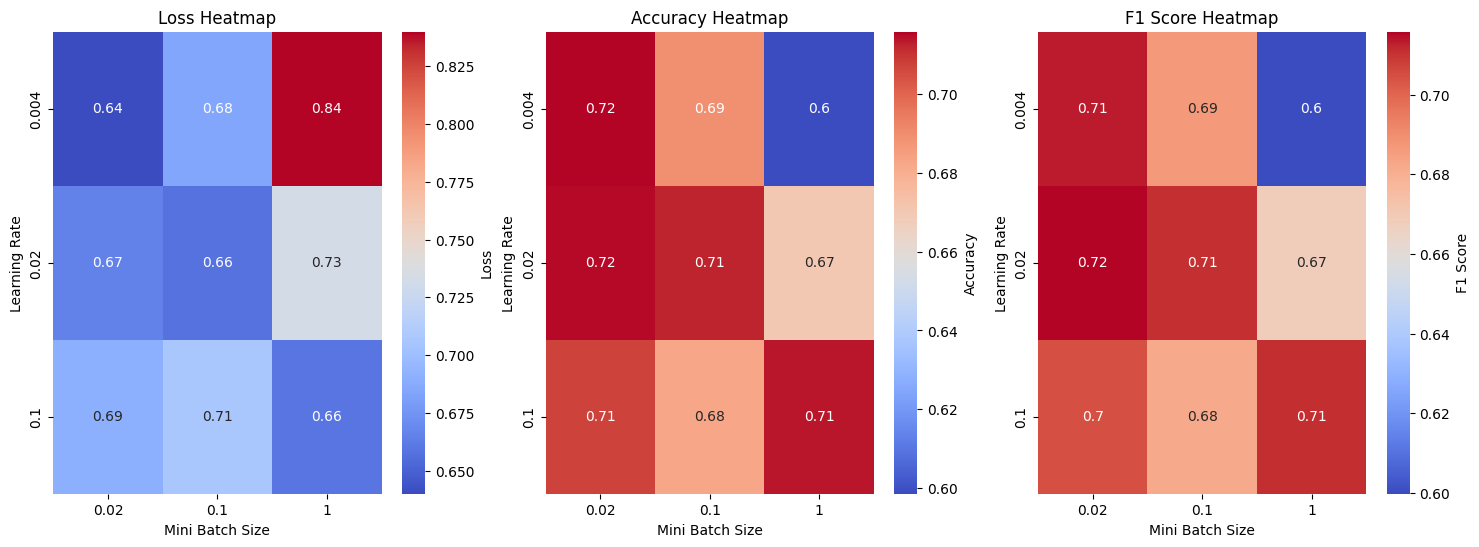

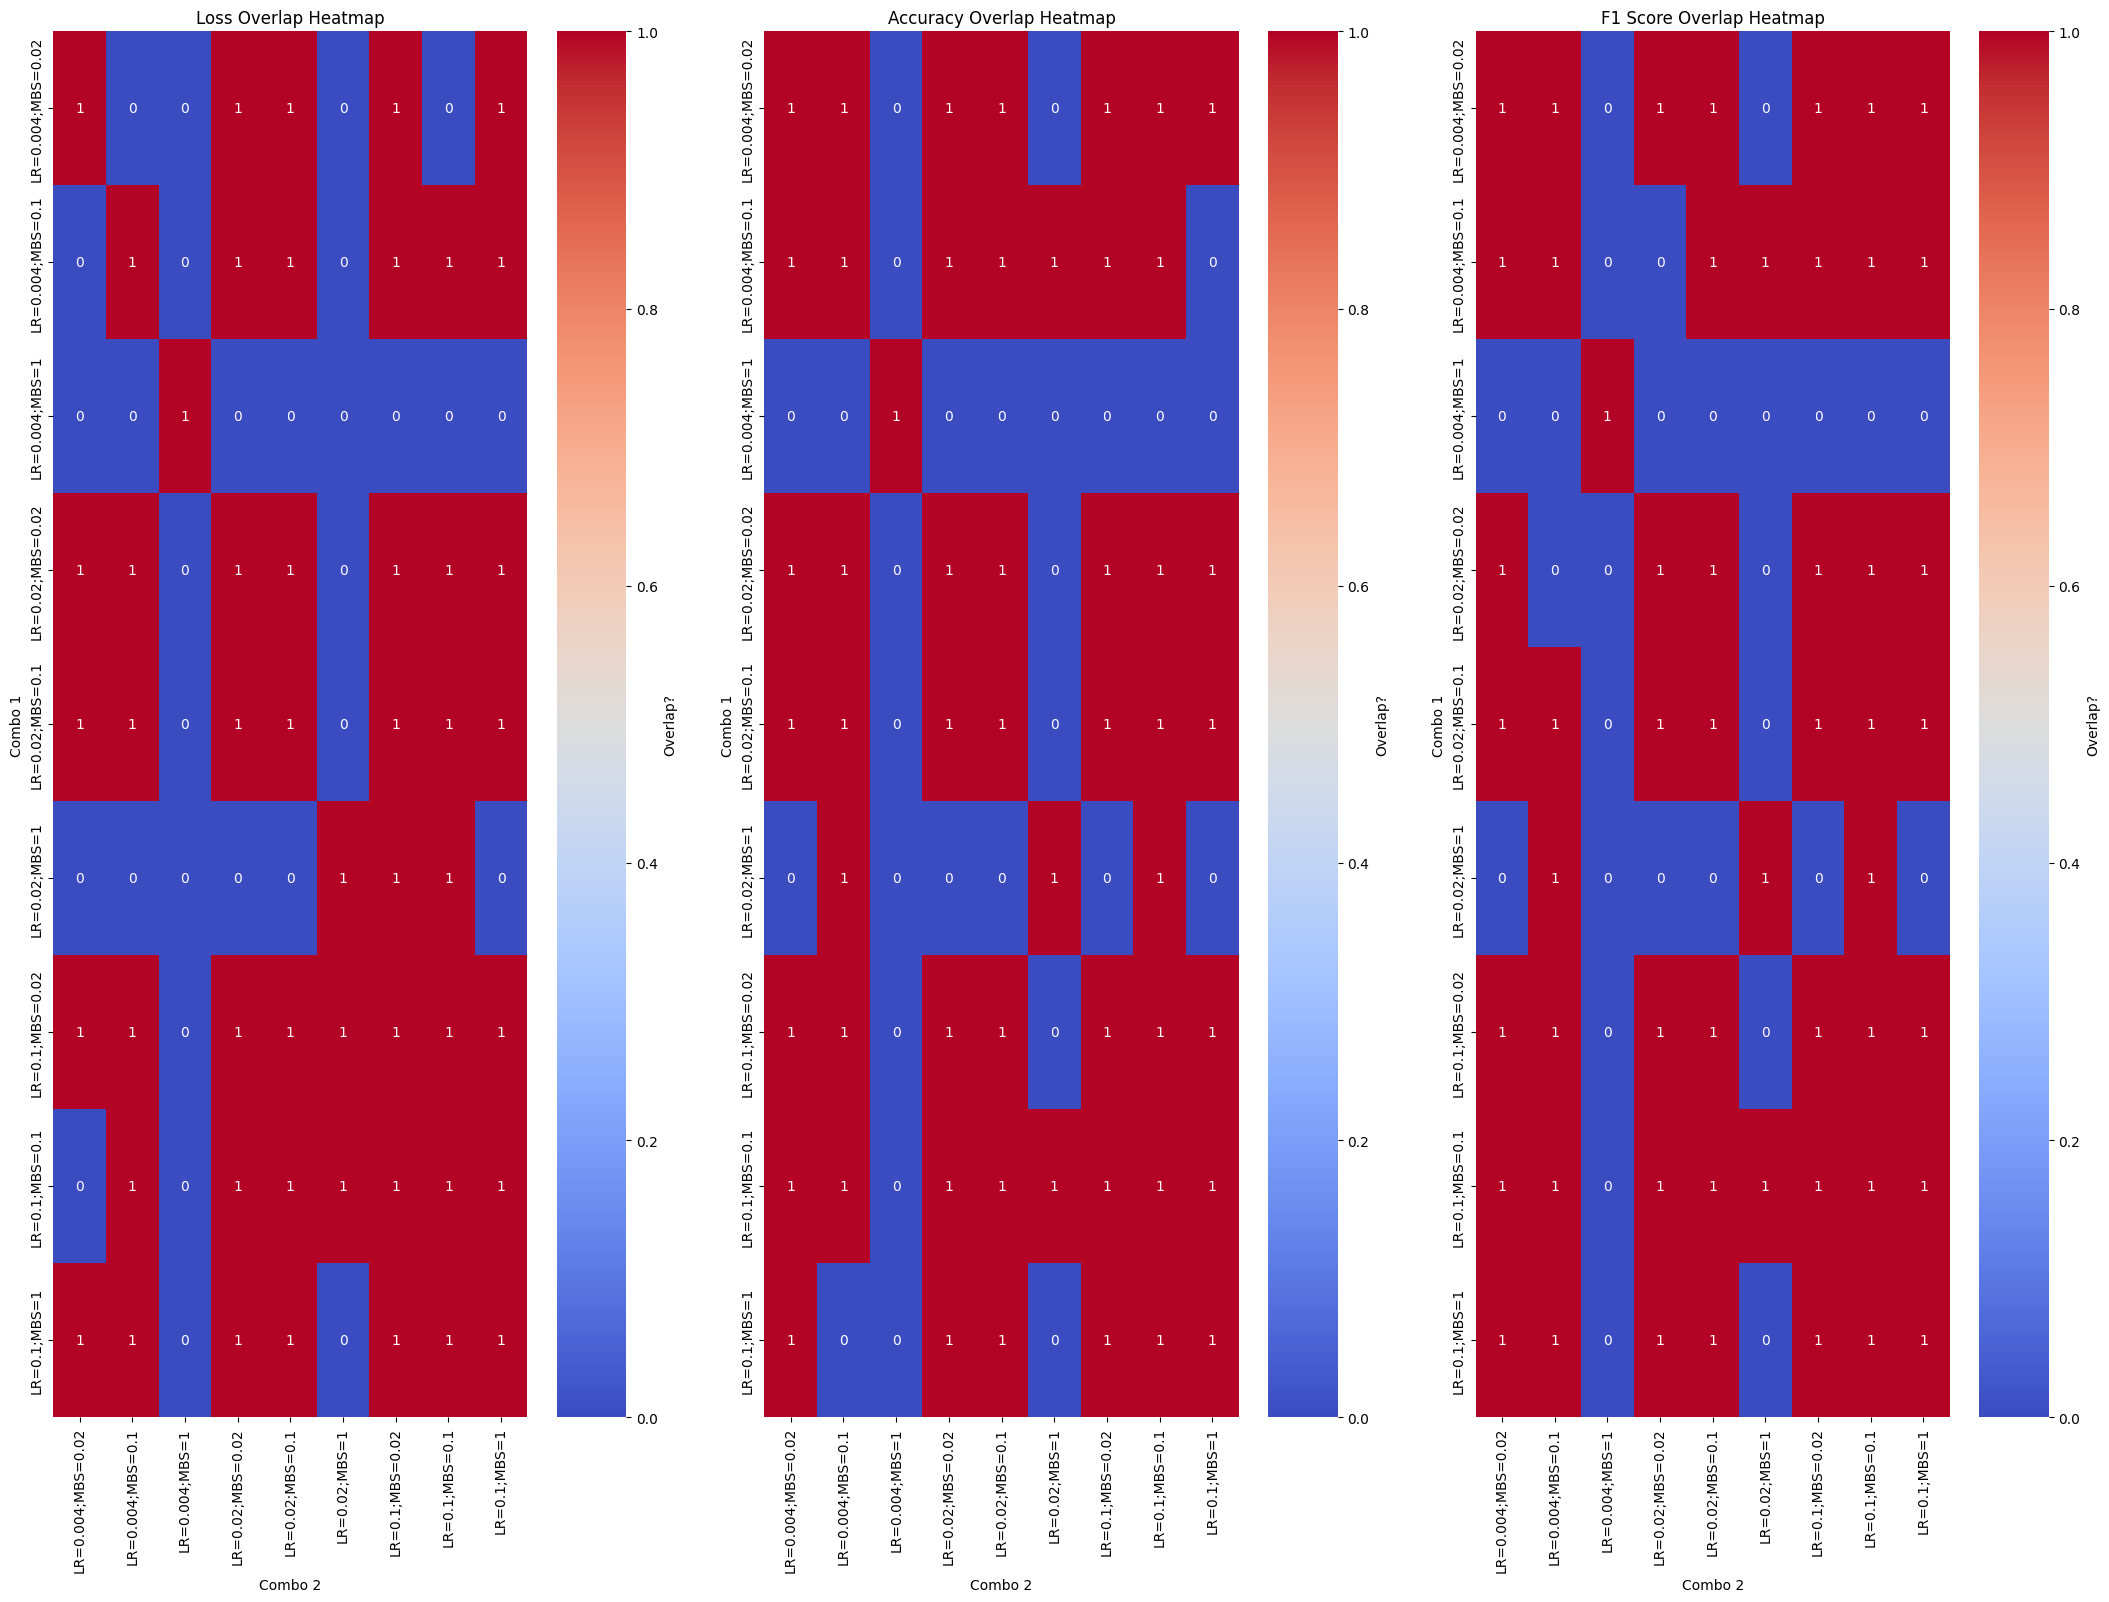

In [47]:
analyze_hyperparameter_opt_results(result_from_opt_sdg)

### ADAM

#### Grid Search

In [48]:
algo = ALGORITHMS[1] # ADAM
result_from_opt_adam = perform_hyperparameter_optimization(X_train, y_train, algo, K_FOLD_SEED, TRAINING_SEED, NUM_FOLDS)

with open(f'{algo}-hyp-opt.json', 'w') as file:
    json.dump(result_from_opt_adam, file, indent=4) 

-------------------------------------------------------------
*****************************************************
Hyperparameters for experiment 1: 
	Learning Rate:  0.1
	Mini Batch Size Ratio:  0.02
*****************************************************
Fold 1 of 8
Training model with seed:  12345
Epoch:  0  Loss:  0.9992068493995918  Accuracy:  0.508140763440052  F1 Score:  0.54188799301391
Epoch:  1  Loss:  0.9141389218126597  Accuracy:  0.5417542080489957  F1 Score:  0.5973233361161764
Epoch:  2  Loss:  0.8296436987647346  Accuracy:  0.5922118890471533  F1 Score:  0.6339286973518289
Epoch:  3  Loss:  0.8747107860993366  Accuracy:  0.5549219732238752  F1 Score:  0.607701494927896
Epoch:  4  Loss:  0.8583632437836508  Accuracy:  0.5771683712287539  F1 Score:  0.6080147349899786
Epoch:  5  Loss:  0.8496332239059984  Accuracy:  0.5760429227123169  F1 Score:  0.6285463086999414
Epoch:  6  Loss:  0.8410949264826323  Accuracy:  0.6011404625865735  F1 Score:  0.6361006983731107
Epoch:  7 

#### Results

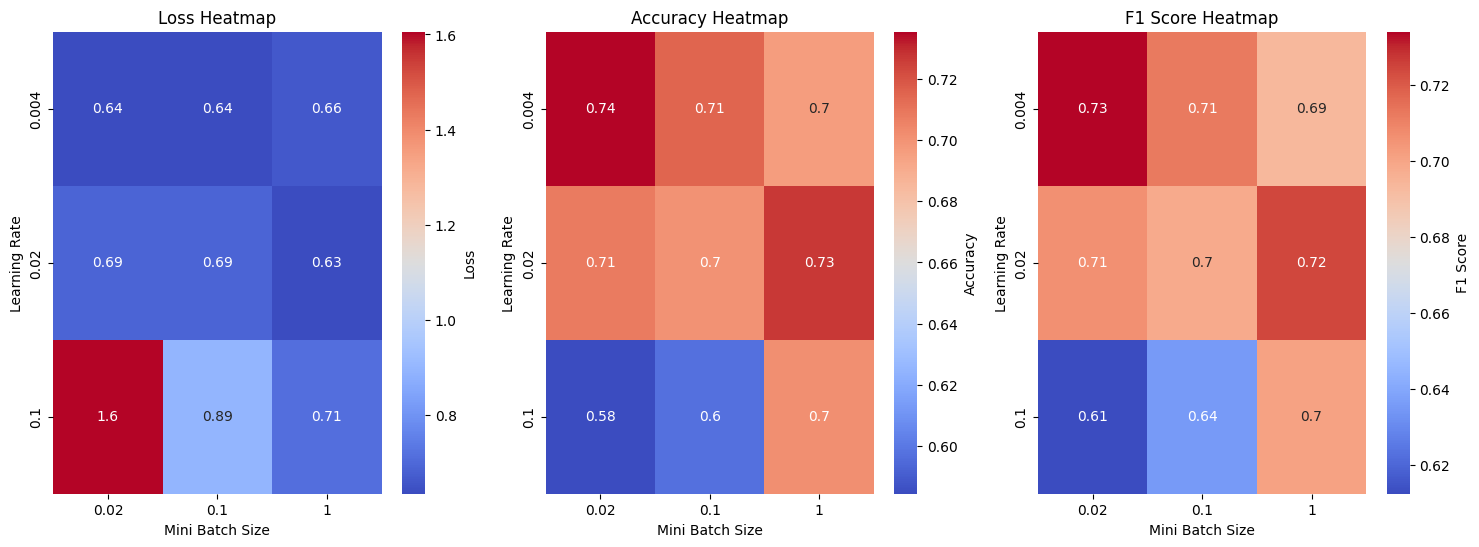

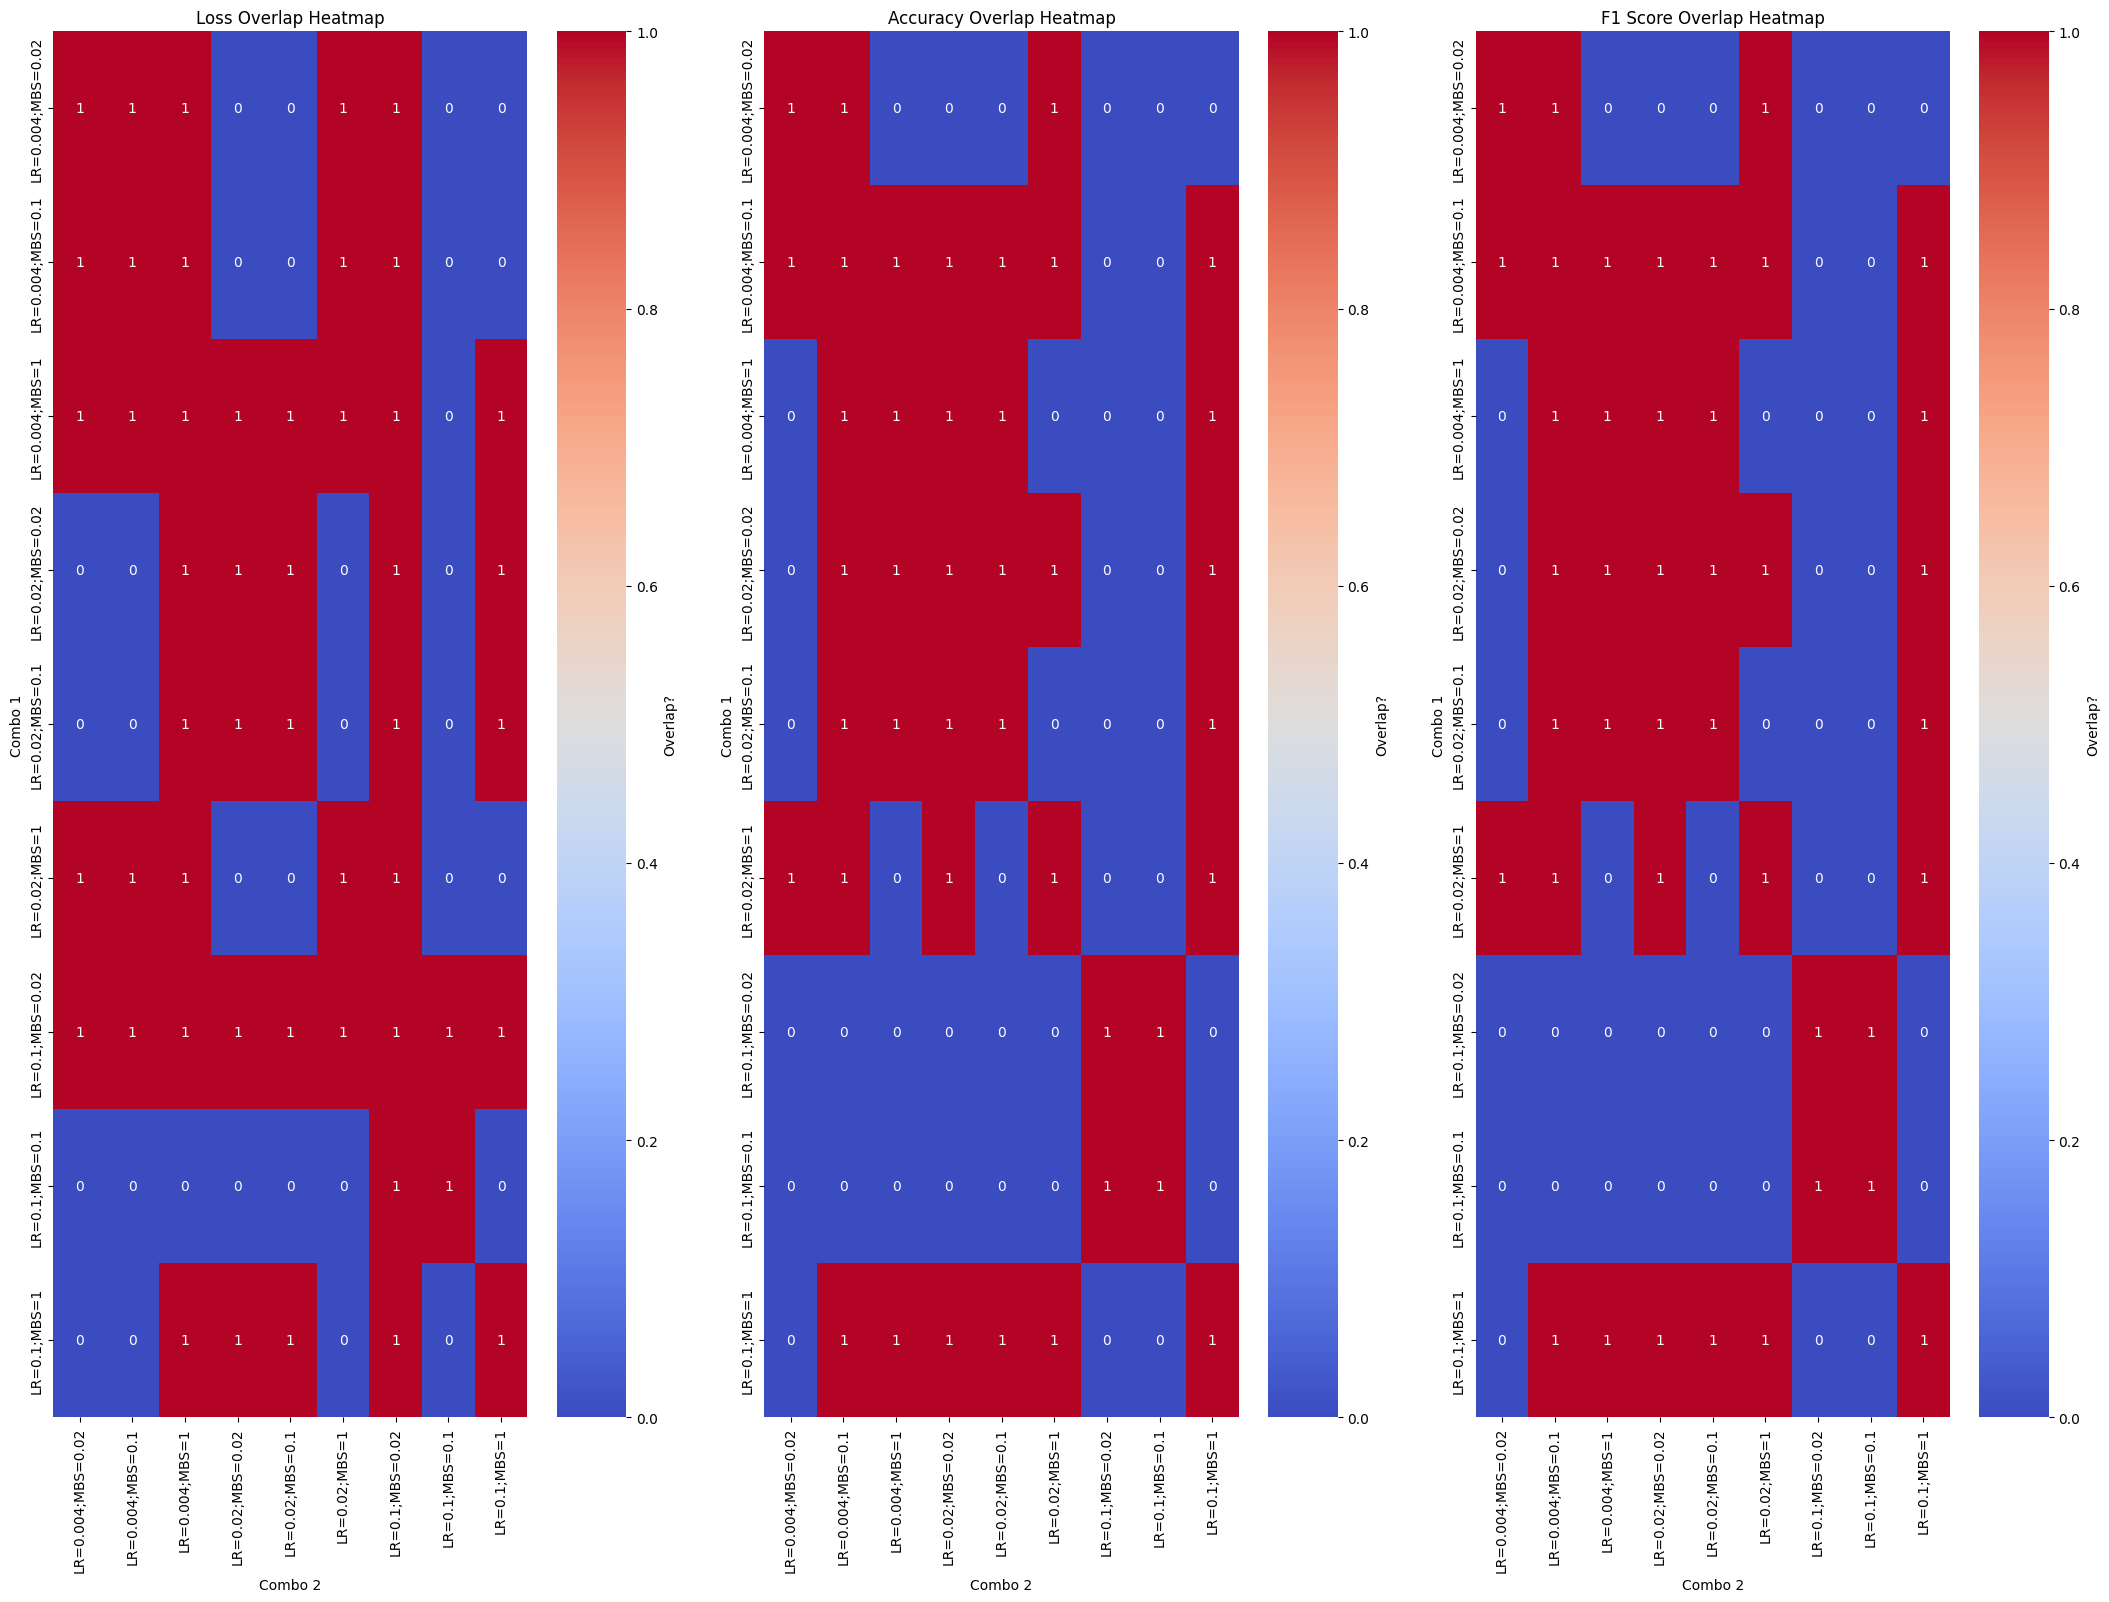

In [49]:
analyze_hyperparameter_opt_results(result_from_opt_adam)

### RProp

#### Grid Search

In [50]:
algo = ALGORITHMS[2] #RPROP
result_from_opt_rprop = perform_hyperparameter_optimization(X_train, y_train, algo, K_FOLD_SEED, TRAINING_SEED, NUM_FOLDS)

with open(f'{algo}-hyp-opt.json', 'w') as file:
    json.dump(result_from_opt_rprop, file, indent=4) 

-------------------------------------------------------------
*****************************************************
Hyperparameters for experiment 1: 
	Learning Rate:  0.1
	Mini Batch Size Ratio:  0.02
*****************************************************
Fold 1 of 8
Training model with seed:  12345
Epoch:  0  Loss:  0.9890552335211924  Accuracy:  0.5652010827397956  F1 Score:  0.5755671366143339
Epoch:  1  Loss:  0.8134323236893635  Accuracy:  0.6367046874181993  F1 Score:  0.632618084237144
Epoch:  2  Loss:  0.8109090130726974  Accuracy:  0.6383553502403674  F1 Score:  0.636293963027367
Epoch:  3  Loss:  0.8111090862235817  Accuracy:  0.6402310963903441  F1 Score:  0.6364134963544357
Epoch:  4  Loss:  0.8124617408661424  Accuracy:  0.6389555874026838  F1 Score:  0.6368392700635219
Epoch:  5  Loss:  0.8114403088768276  Accuracy:  0.6389930988309764  F1 Score:  0.6351343272327026
Epoch:  6  Loss:  0.814272399280681  Accuracy:  0.6377175927949267  F1 Score:  0.6323806679173221
Epoch:  7

#### Results

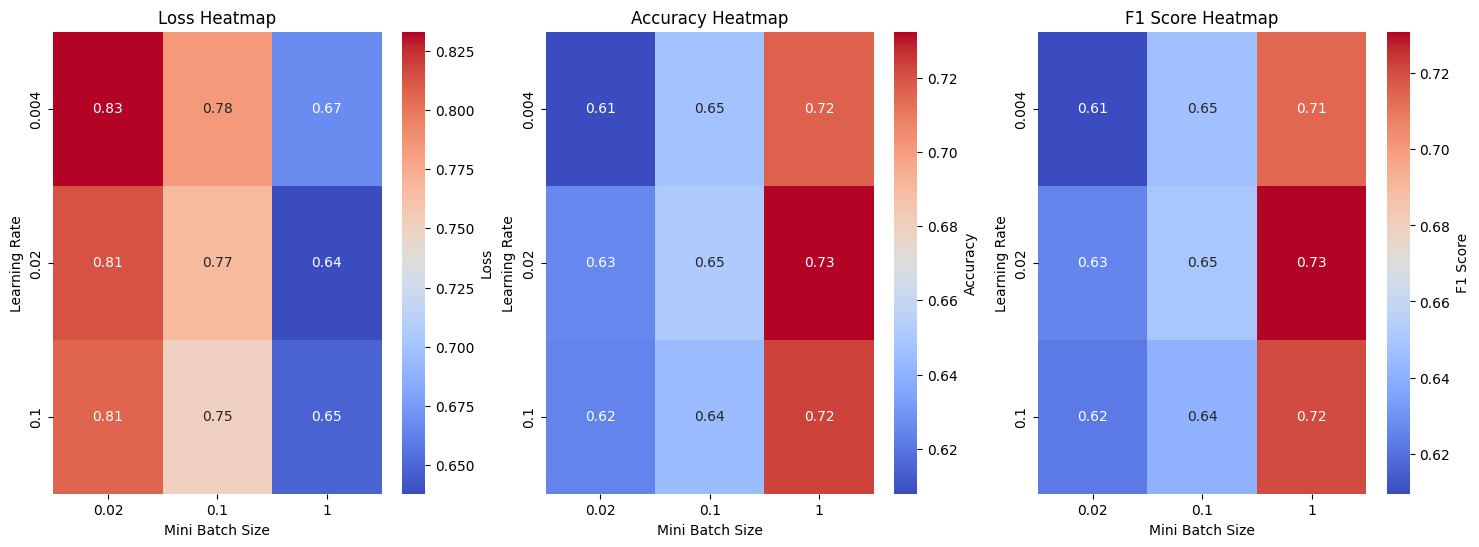

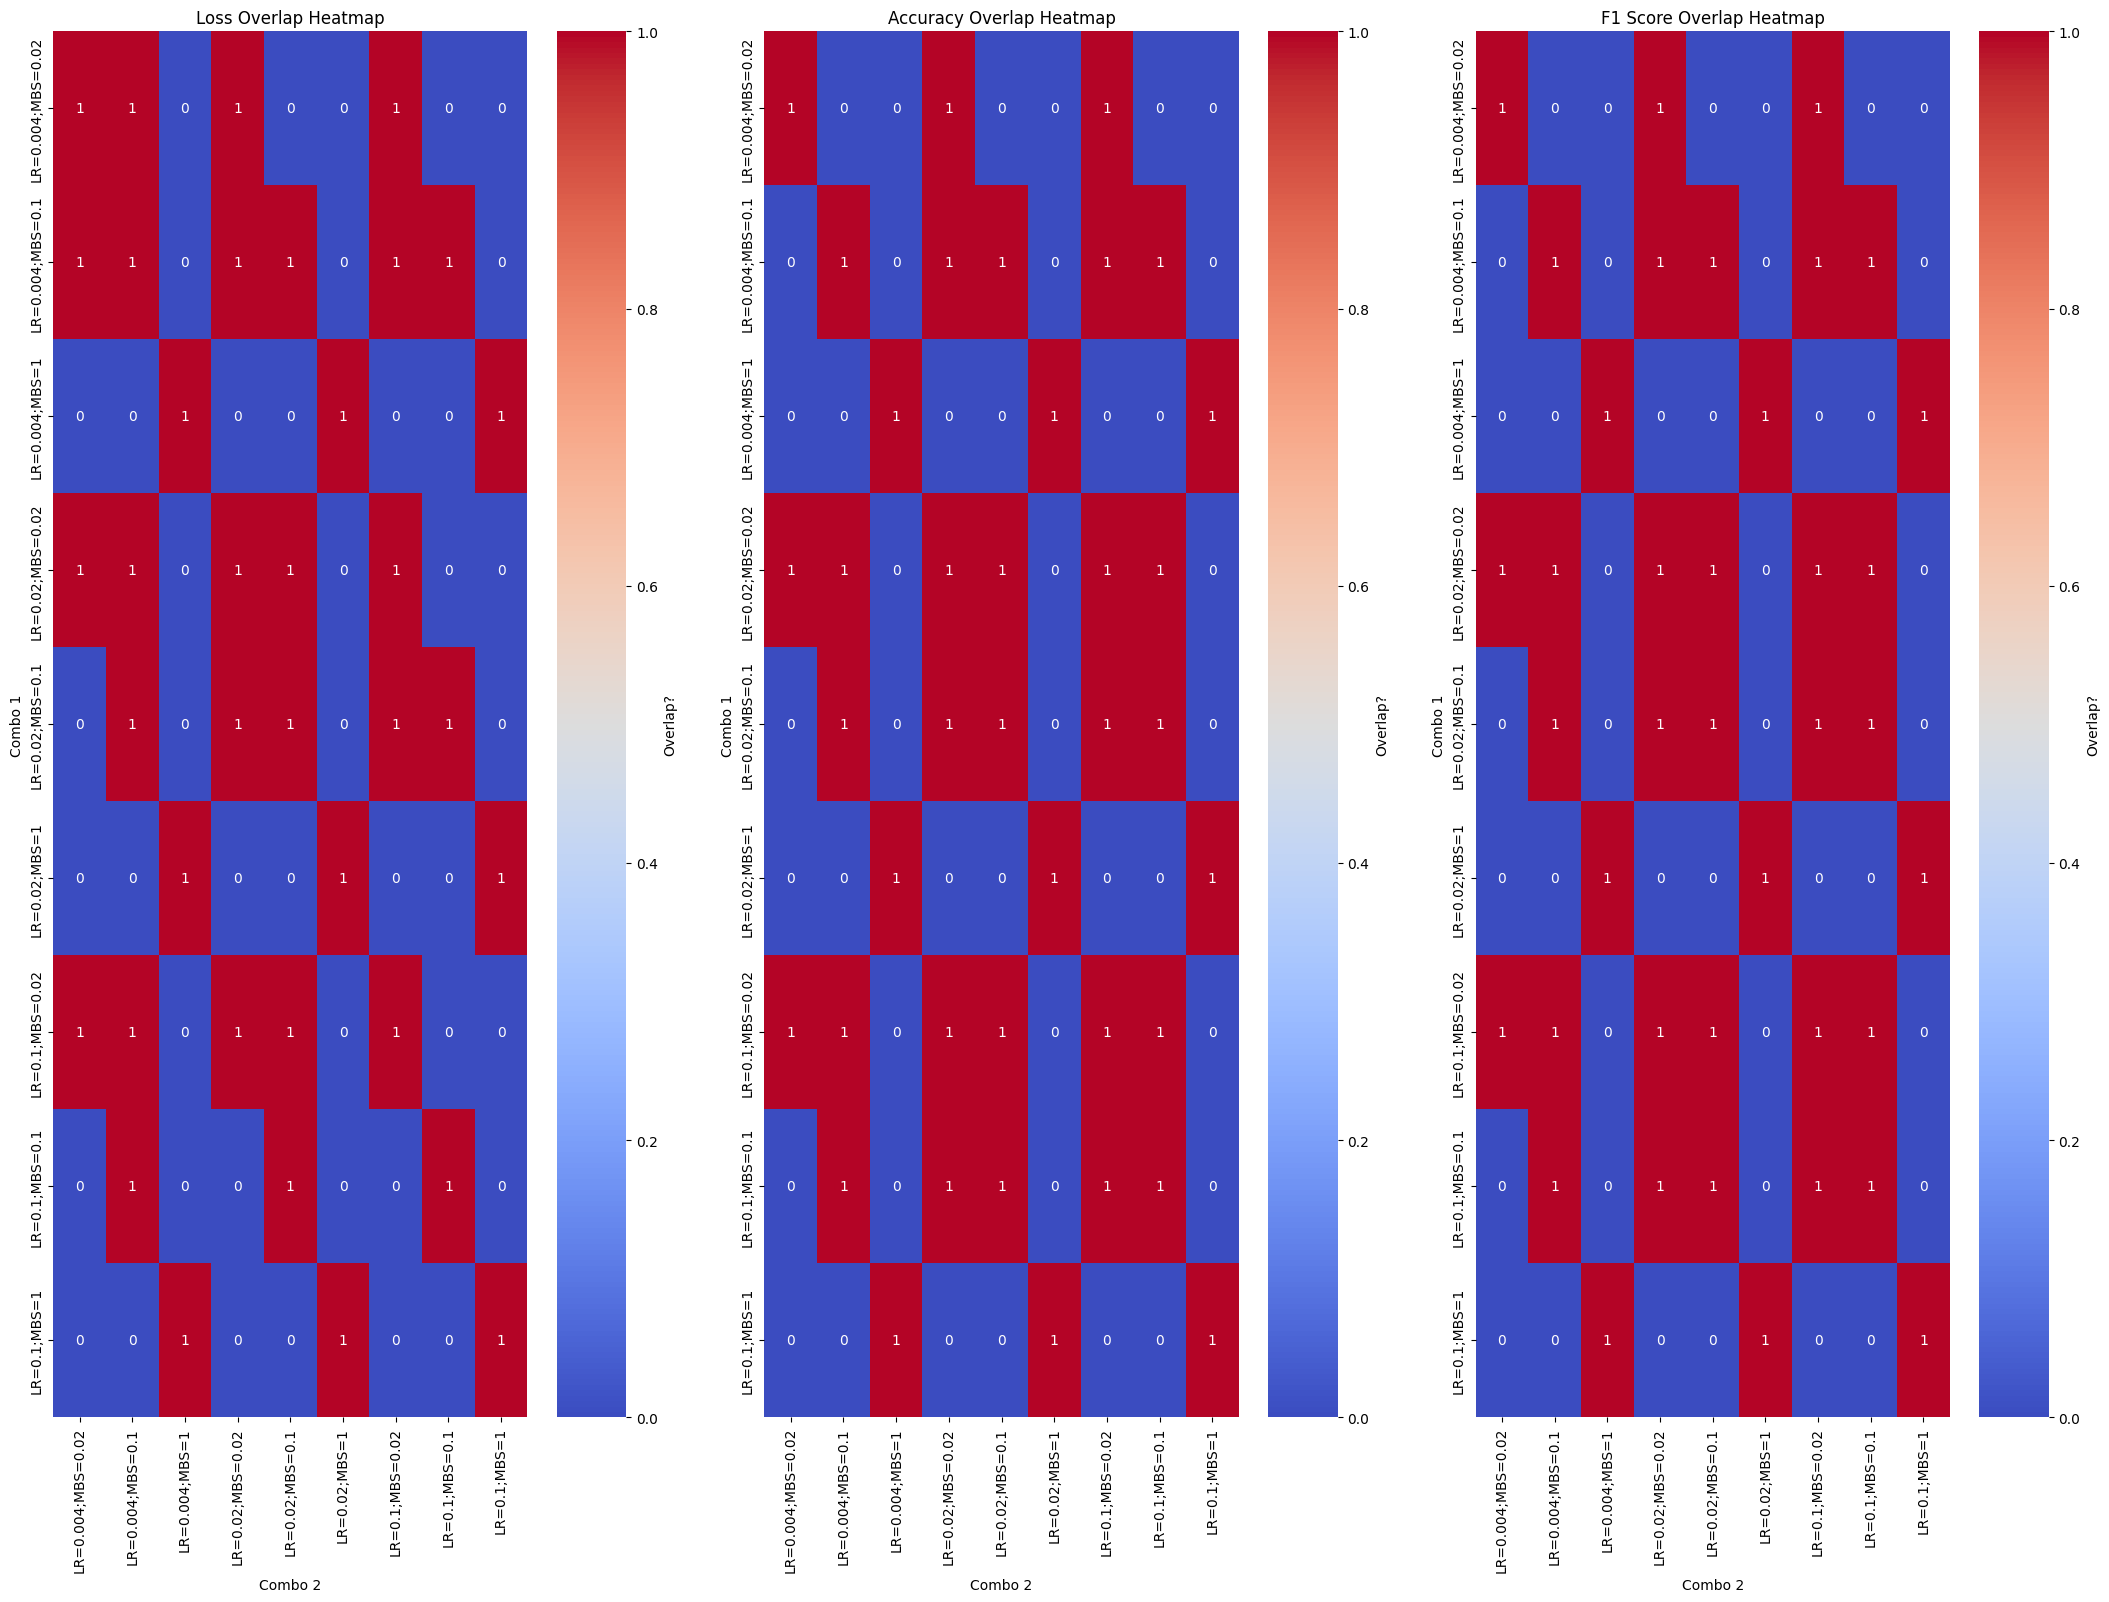

In [51]:
analyze_hyperparameter_opt_results(result_from_opt_rprop)

### Parameter Value Selection

In [52]:
# raise Exception("Please provide the best hyperparameters for the model")

In [53]:
SGD_LR = 0.02 
SGD_MBS = 0.02 

ADAM_LR = 0.004 
ADAM_MBS = 0.02 

RPROP_LR = 0.02
RPROP_MBS = 1

# Hybrid Training Algorithm Implementation

In [54]:
def train_eval_model_hybrid(X_train : pd.DataFrame, y_train : pd.DataFrame, X_test : pd.DataFrame, y_test : pd.DataFrame, seed : int, 
                batch_size_ratio_sgd: int = GLOBAL_MINI_BATCH_SIZE_OPTIONS[0], batch_size_ratio_rprop: int = GLOBAL_MINI_BATCH_SIZE_OPTIONS[-1],
                sgd_lr: float = GLOBAL_LEARNING_RATE_OPTIONS[0],
                adam_lr: float = GLOBAL_LEARNING_RATE_OPTIONS[0], rprop_lr: float = GLOBAL_LEARNING_RATE_OPTIONS[0], 
                num_epochs: int = GLOBAL_MAX_NUM_EPOCHS):
    
    print("Training model with seed: ", seed)
    
    # Set random seed
    torch.manual_seed(seed)
    
    
    # Convert training data (X and y) into PyTorch tensors
    X = torch.tensor(X_train.values, dtype=torch.float32)
    y = torch.tensor(y_train, dtype=torch.long)
    
   
    # Get model architecture
    _MODEL : nn.Module = helper_build_model_architecture(X_train.shape[1], y_train.max().item() + 1)
    
    # Init. model weights
    _MODEL.apply(lambda module: helper_init_model_weights(module))
    
    # Define loss function
    _LOSS_FUNCTION : nn.Module = nn.CrossEntropyLoss()
    
    # Training algorithm / optimzer with training hyperparameters
    _TRAINING_ALGORITHM_1 : nn.Module = optim.SGD(_MODEL.parameters(), lr= sgd_lr / 2, momentum=SGD_MOMENTUM)
    _TRAINING_ALGORITHM_2 : nn.Module = optim.Adam(_MODEL.parameters(), lr= adam_lr / 2)
    _TRAINING_ALGORITHM_3 : nn.Module = optim.Rprop(_MODEL.parameters(), lr= rprop_lr / 2)

    
    # Init. loss, accuracy, and F1 history
    training_epoch_losses = []
    training_epoch_accuracies = []
    training_epoch_f1_scores = []
    
    testing_epoch_losses = []
    testing_epoch_accuracies = []
    testing_epoch_f1_scores = []
    
    
    # Training loop
    epoch = 0
    
    is_phase_1 = True
    
    while epoch < num_epochs:
        
        running_epoch_loss = 0.0
        running_epoch_accuracy = 0.0
        running_epoch_f1_score = 0.0
        
        _MODEL.train()
        
        if is_phase_1:
            _BATCH_SIZE = int(batch_size_ratio_sgd * len(X))
        else:
            _BATCH_SIZE = int(batch_size_ratio_rprop * len(X))
        
        for i in range(0, len(X), _BATCH_SIZE):
            # Set X and y for the batch
            X_for_batch = X[i:i+_BATCH_SIZE]
            y_for_batch = y[i:i+_BATCH_SIZE]
            
            # Do forward pass through network for predictions for batch
            y_pred_for_batch = _MODEL(X_for_batch)
            
            # Calculate loss for the batch (label encoding used)
            loss_for_batch = _LOSS_FUNCTION(y_pred_for_batch, y_for_batch)
            
            if epoch <= 0.75 * num_epochs:
                is_phase_1 = True
            else:
                is_phase_1 = False
            
            # Zero gradients (reset gradients which are accumlated)
            if epoch <= 0.75 * num_epochs:
                _TRAINING_ALGORITHM_1.zero_grad()
                _TRAINING_ALGORITHM_2.zero_grad()
            else:
                _TRAINING_ALGORITHM_2.zero_grad()
                _TRAINING_ALGORITHM_3.zero_grad()
            
            
            loss_for_batch.backward()
            
            # Step for the batch
            if epoch <= 0.75 * num_epochs:
                _TRAINING_ALGORITHM_1.step()
                _TRAINING_ALGORITHM_2.step()
            else:
                _TRAINING_ALGORITHM_2.step()
                _TRAINING_ALGORITHM_3.step()
          
            # Add to the running loss for the epoch
            running_epoch_loss += float(loss_for_batch)
            
            # Calculate accuracy for the batch (find the class with max probability and use that as prediction - Softmax)
            running_epoch_accuracy += (torch.argmax(y_pred_for_batch, 1) == y_for_batch).float().mean().item()
            
            # Calculate F1 score for the batch
            running_epoch_f1_score += f1_score(torch.argmax(y_pred_for_batch, 1), y_for_batch, average='weighted')
            
        # Calculate and display traininf average loss, accuracy, and F1 score for the epoch
        epoch_loss = running_epoch_loss / (len(X) / _BATCH_SIZE)
        epoch_accuracy = running_epoch_accuracy / (len(X) / _BATCH_SIZE)
        epoch_f1_score = running_epoch_f1_score / (len(X) / _BATCH_SIZE)
        
        # Log metrics
        # Training loss, accuracy, and F1 score
        print("Epoch: ", epoch, " Loss: ", epoch_loss, " Accuracy: ", epoch_accuracy, " F1 Score: ", epoch_f1_score)
        
        # Test loss, accuracy, and F1 score - this is only uses for logging and not for the training process
        test_loss, test_accuracy, test_f1_score = evaluate_model(X_test, y_test, _MODEL)
            
        # Add metrics to list
        training_epoch_losses.append(epoch_loss)
        training_epoch_accuracies.append(epoch_accuracy)
        training_epoch_f1_scores.append(epoch_f1_score)
        
        testing_epoch_losses.append(test_loss)
        testing_epoch_accuracies.append(test_accuracy)
        testing_epoch_f1_scores.append(test_f1_score)
        
        # Shuffle data for next epoch
        indices = torch.randperm(len(X))
        X = X[indices]
        y = y[indices]
        
        # Increment epoch
        epoch += 1
        
    return _MODEL, training_epoch_losses, training_epoch_accuracies, training_epoch_f1_scores, \
  testing_epoch_losses, testing_epoch_accuracies, testing_epoch_f1_scores, epoch
    

# Comparison of Training Algorithms

In [55]:
NUM_TRIALS_PER_ALGORTIHM = 25

In [56]:
def get_metrics_from_trials(trials):
    # Get metrics for the trials
    _RESULTS = {}
    
    # Take the value in the final epoch as the training value
    _RESULTS["final_training_losses"] = [t["training_losses"][-1] for t in trials]
    _RESULTS["final_training_accuracies"] = [t["training_accuracies"][-1] for t in trials]
    _RESULTS["final_training_f1_scores"] = [t["training_f1_scores"][-1] for t in trials]
    
    # Take the value in the final epoch as the testing value
    _RESULTS["final_testing_losses"] = [t["testing_losses"][-1] for t in trials]
    _RESULTS["final_testing_accuracies"] = [t["testing_accuracies"][-1] for t in trials]
    _RESULTS["final_testing_f1_scores"] = [t["testing_f1_scores"][-1] for t in trials]

    _RESULTS["mean_training_loss"] = np.mean(_RESULTS["final_training_losses"])
    _RESULTS["std_training_loss"] = np.std(_RESULTS["final_training_losses"])
    _RESULTS["mean_training_accuracy"] = np.mean(_RESULTS["final_training_accuracies"])
    _RESULTS["std_training_accuracy"] = np.std(_RESULTS["final_training_accuracies"])
    _RESULTS["mean_training_f1_score"] = np.mean(_RESULTS["final_training_f1_scores"])
    _RESULTS["std_training_f1_score"] = np.std(_RESULTS["final_training_f1_scores"])

    _RESULTS["mean_testing_loss"] = np.mean(_RESULTS["final_testing_losses"])
    _RESULTS["std_testing_loss"] = np.std(_RESULTS["final_testing_losses"])
    _RESULTS["mean_testing_accuracy"] = np.mean(_RESULTS["final_testing_accuracies"])
    _RESULTS["std_testing_accuracy"] = np.std(_RESULTS["final_testing_accuracies"])
    _RESULTS["mean_testing_f1_score"] = np.mean(_RESULTS["final_testing_f1_scores"])
    _RESULTS["std_testing_f1_score"] = np.std(_RESULTS["final_testing_f1_scores"])
    
    return _RESULTS

### SDG with Momentum

In [57]:
SGD_TRIALS = []
for i in range(0, NUM_TRIALS_PER_ALGORTIHM):
    model, training_losses, training_accuracies, training_f1_scores, \
    testing_losses, testing_accuracies, testing_f1_scores, num_epochs = train_eval_model(X_train, 
                                                                        y_train, 
                                                                        X_test, 
                                                                        y_test,
                                                                        (i+1) * 100,
                                                                        SGD_MBS,
                                                                        SGD_LR,
                                                                        "sgd")
    SGD_TRIALS.append({
        "num_epochs": num_epochs,
        "training_losses": training_losses,
        "training_accuracies": training_accuracies,
        "training_f1_scores": training_f1_scores,
        "testing_losses": testing_losses,
        "testing_accuracies": testing_accuracies,
        "testing_f1_scores": testing_f1_scores
    })
    
# Write to file
with open('SGD-trials.json', 'w') as file:
    json.dump(SGD_TRIALS, file, indent=4)
    
# Get metrics for the trials
SGD_RESULTS = get_metrics_from_trials(SGD_TRIALS)

# Write results to file
with open('sdg-results.json', 'w') as file:
    json.dump(SGD_RESULTS, file, indent=4)


Training model with seed:  100
Epoch:  0  Loss:  1.058210027562039  Accuracy:  0.49490813609809076  F1 Score:  0.5144111275739931
Epoch:  1  Loss:  0.8793783632163301  Accuracy:  0.6187926449174956  F1 Score:  0.6196924472651393
Epoch:  2  Loss:  0.814136430847989  Accuracy:  0.6665616746649655  F1 Score:  0.6682212057413127
Epoch:  3  Loss:  0.7749876995412072  Accuracy:  0.6815747979431954  F1 Score:  0.6798348332550311
Epoch:  4  Loss:  0.7518710955234338  Accuracy:  0.6839894983086374  F1 Score:  0.6852064111074359
Epoch:  5  Loss:  0.7315466059161609  Accuracy:  0.7065616810415674  F1 Score:  0.7059339610320985
Epoch:  6  Loss:  0.7277230973005921  Accuracy:  0.6970078722385598  F1 Score:  0.6965708593946098
Epoch:  7  Loss:  0.7144919582552172  Accuracy:  0.7055118091463104  F1 Score:  0.7031278299794914
Epoch:  8  Loss:  0.7025188852482894  Accuracy:  0.7001574760346901  F1 Score:  0.6998393710090063
Epoch:  9  Loss:  0.6989721442770771  Accuracy:  0.7081364829396326  F1 Score: 

### Adam

In [58]:
ADAM_TRIALS = []
for i in range(0, NUM_TRIALS_PER_ALGORTIHM):
    model, training_losses, training_accuracies, training_f1_scores, \
    testing_losses, testing_accuracies, testing_f1_scores, num_epochs = train_eval_model(X_train, 
                                                                        y_train, 
                                                                        X_test, 
                                                                        y_test,
                                                                        (i+1) * 100,
                                                                        ADAM_MBS,
                                                                        ADAM_LR,
                                                                        "adam")
    ADAM_TRIALS.append({
        "num_epochs": num_epochs,
        "training_losses": training_losses,
        "training_accuracies": training_accuracies,
        "training_f1_scores": training_f1_scores,
        "testing_losses": testing_losses,
        "testing_accuracies": testing_accuracies,
        "testing_f1_scores": testing_f1_scores
    })
    
# Write to file
with open('adam-trials.json', 'w') as file:
    json.dump(ADAM_TRIALS, file, indent=4)
    

# Get metrics for the trials
ADAM_RESULTS = get_metrics_from_trials(ADAM_TRIALS)

# Write results to file
with open('adam-results.json', 'w') as file:
    json.dump(ADAM_RESULTS, file, indent=4)

Training model with seed:  100
Epoch:  0  Loss:  1.0666171744739603  Accuracy:  0.4828346449715572  F1 Score:  0.5021642977650019
Epoch:  1  Loss:  0.8742688366121508  Accuracy:  0.6193175814596061  F1 Score:  0.6227441480145136
Epoch:  2  Loss:  0.8126263002711018  Accuracy:  0.6531233556627289  F1 Score:  0.6540663697410095
Epoch:  3  Loss:  0.7705243154460677  Accuracy:  0.680734908987531  F1 Score:  0.6789318357155332
Epoch:  4  Loss:  0.7449523823780652  Accuracy:  0.6944881839702136  F1 Score:  0.6956848246072735
Epoch:  5  Loss:  0.7255774297739265  Accuracy:  0.7009973721241388  F1 Score:  0.6998291298485628
Epoch:  6  Loss:  0.7063512237053219  Accuracy:  0.6996325400870617  F1 Score:  0.6999469492441908
Epoch:  7  Loss:  0.6946848100877497  Accuracy:  0.7118110203054634  F1 Score:  0.7080896089854164
Epoch:  8  Loss:  0.6891657234176877  Accuracy:  0.7059317571910348  F1 Score:  0.704326520452559
Epoch:  9  Loss:  0.6750112111174216  Accuracy:  0.7193700732208613  F1 Score:  

### RProp

In [59]:
RPROP_TRIALS = []
for i in range(0, NUM_TRIALS_PER_ALGORTIHM):
    model, training_losses, training_accuracies, training_f1_scores, \
    testing_losses, testing_accuracies, testing_f1_scores, num_epochs = train_eval_model(X_train, 
                                                                        y_train, 
                                                                        X_test, 
                                                                        y_test,
                                                                        (i+1) * 100,
                                                                        RPROP_MBS,
                                                                        RPROP_LR,
                                                                        "rprop")
    RPROP_TRIALS.append({
        "num_epochs": num_epochs,
        "training_losses": training_losses,
        "training_accuracies": training_accuracies,
        "training_f1_scores": training_f1_scores,
        "testing_losses": testing_losses,
        "testing_accuracies": testing_accuracies,
        "testing_f1_scores": testing_f1_scores
    })

# Write to file
with open('rprop-trials.json', 'w') as file:
    json.dump(RPROP_TRIALS, file, indent=4)
    
    
# Get metrics for the trials
RPROP_RESULTS = get_metrics_from_trials(RPROP_TRIALS)

# Write results to file
with open('rprop-results.json', 'w') as file:
    json.dump(RPROP_RESULTS, file, indent=4)

Training model with seed:  100
Epoch:  0  Loss:  1.6214286088943481  Accuracy:  0.33280840516090393  F1 Score:  0.39875520187446273
Epoch:  1  Loss:  1.2519546747207642  Accuracy:  0.33070865273475647  F1 Score:  0.3655182976310581
Epoch:  2  Loss:  1.0674796104431152  Accuracy:  0.43989500403404236  F1 Score:  0.5016092160234771
Epoch:  3  Loss:  1.0038269758224487  Accuracy:  0.48871392011642456  F1 Score:  0.5097638664480126
Epoch:  4  Loss:  0.938791811466217  Accuracy:  0.5506561398506165  F1 Score:  0.5615628988203274
Epoch:  5  Loss:  0.8914422988891602  Accuracy:  0.5973753333091736  F1 Score:  0.599077600616483
Epoch:  6  Loss:  0.8588142395019531  Accuracy:  0.6157480478286743  F1 Score:  0.6163665343227832
Epoch:  7  Loss:  0.8261967301368713  Accuracy:  0.6398950219154358  F1 Score:  0.6408866434806237
Epoch:  8  Loss:  0.7977100610733032  Accuracy:  0.652493417263031  F1 Score:  0.651957167106733
Epoch:  9  Loss:  0.769784152507782  Accuracy:  0.6766403913497925  F1 Score:

### Hybrid Algorithm

In [60]:
HYBRID_TRIALS = []
NUM_EPOCHS_FOR_HYBRID = 150
for i in range(0, NUM_TRIALS_PER_ALGORTIHM):
    model, training_losses, training_accuracies, training_f1_scores, \
    testing_losses, testing_accuracies, testing_f1_scores, num_epochs = train_eval_model_hybrid(X_train, 
                                                                        y_train, 
                                                                        X_test, 
                                                                        y_test,
                                                                        (i+1) * 100,
                                                                        SGD_MBS, 
                                                                        RPROP_MBS,
                                                                        SGD_LR,
                                                                        ADAM_LR,
                                                                        RPROP_LR,
                                                                        NUM_EPOCHS_FOR_HYBRID) 
    HYBRID_TRIALS.append({
        "num_epochs": num_epochs,
        "training_losses": training_losses,
        "training_accuracies": training_accuracies,
        "training_f1_scores": training_f1_scores,
        "testing_losses": testing_losses,
        "testing_accuracies": testing_accuracies,
        "testing_f1_scores": testing_f1_scores
    })
    
    
# Write to file
with open('hybrid-trials.json', 'w') as file:
    json.dump(HYBRID_TRIALS, file, indent=4)

# Get metrics for the trials
HYBRID_RESULTS = get_metrics_from_trials(HYBRID_TRIALS)

# Write results to file
with open('hybrid-results.json', 'w') as file:
    json.dump(HYBRID_RESULTS, file, indent=4)

Training model with seed:  100
Epoch:  0  Loss:  1.0322649736259795  Accuracy:  0.5029098150668455  F1 Score:  0.5294060053521463
Epoch:  1  Loss:  0.8496131471604986  Accuracy:  0.6138651727779331  F1 Score:  0.6170755727281392
Epoch:  2  Loss:  0.7861368791212683  Accuracy:  0.6623125614384048  F1 Score:  0.6613822546526965
Epoch:  3  Loss:  0.7567913247260741  Accuracy:  0.6651586591931563  F1 Score:  0.6625888617099062
Epoch:  4  Loss:  0.7318851680866211  Accuracy:  0.6696402022713109  F1 Score:  0.6671217464056256
Epoch:  5  Loss:  0.7226555226212841  Accuracy:  0.6740155509281754  F1 Score:  0.672816428538048
Epoch:  6  Loss:  0.7055417306714564  Accuracy:  0.689690329686113  F1 Score:  0.6878280277732048
Epoch:  7  Loss:  0.6920085978975901  Accuracy:  0.7026676884939583  F1 Score:  0.7002005457407245
Epoch:  8  Loss:  0.6869371062830875  Accuracy:  0.692791300836575  F1 Score:  0.6903663497885176
Epoch:  9  Loss:  0.6702655325714336  Accuracy:  0.70177562985433  F1 Score:  0.6

# Results

## Summary Metrics

In [61]:
print("SGD")
for key, value in SGD_RESULTS.items():
    print(f"{key} = {value}")

SGD
final_training_losses = [0.48966740270455683, 0.5310144573371868, 0.5418242889439341, 0.5023578064022415, 0.4924326722390383, 0.5437249383275591, 0.5443794998909858, 0.5110482073518549, 0.4812176393085891, 0.5471489306509965, 0.5266651608812528, 0.5425034703857943, 0.6252198126841718, 0.5502747521938615, 0.5075451456499225, 0.5013479794104269, 0.527695606293015, 0.4804646267665653, 0.5423119181723107, 0.5238697533375948, 0.5472079751998421, 0.5273267052305026, 0.5046188337596383, 0.5235122244189105, 0.5499044225910518]
final_training_accuracies = [0.8104986919192818, 0.792020999352763, 0.7891863556984529, 0.8114435794785267, 0.7970603735115273, 0.7723884529329035, 0.7897112845122971, 0.79569554147445, 0.8154330757972137, 0.780682414629328, 0.7825721796416235, 0.7876115478555675, 0.7716535483132511, 0.7891863568874169, 0.7958005317552822, 0.7975853035143354, 0.7965354375638988, 0.8028346522899438, 0.7767979056190631, 0.7891863533205248, 0.7818372702661149, 0.7895013158402732, 0.8083

In [62]:
print("ADAM")
for key, value in ADAM_RESULTS.items():
    print(f"{key} = {value}")

ADAM
final_training_losses = [0.4786104926287033, 0.48300100303697463, 0.4658061120140897, 0.4905083523647679, 0.49997651354847306, 0.5036098586605603, 0.4684313945570017, 0.49148570458720053, 0.4672789409248222, 0.528481601292067, 0.44867365468205433, 0.5225154885156887, 0.43694587417162, 0.48556026092038695, 0.4975190883546364, 0.43021033906874073, 0.5066378647261092, 0.5041189350168224, 0.4996353932253019, 0.5042946163437811, 0.46801436125762824, 0.4693383161164332, 0.4938730932596162, 0.48916538418747313, 0.4975364377179484]
final_training_accuracies = [0.8079790066233458, 0.8075590603620675, 0.8261417372645982, 0.8054593189494816, 0.799370082407173, 0.7975853035143354, 0.8099737583495814, 0.8104986919192818, 0.8180577472126078, 0.7775328084552695, 0.8236220513741802, 0.7972703469394073, 0.8306561742867699, 0.8054593237053379, 0.7991601077903288, 0.8306561695309136, 0.8014698214418307, 0.8014698143080464, 0.8112335989168623, 0.8028346487230517, 0.8128084020038916, 0.813543310190436

In [63]:
print("RPROP")
for key, value in RPROP_RESULTS.items():
    print(f"{key} = {value}")

RPROP
final_training_losses = [0.5330901145935059, 0.569786012172699, 0.5430943369865417, 0.5188486576080322, 0.5224702954292297, 0.5419171452522278, 0.49280333518981934, 0.5693216323852539, 0.4767426550388336, 0.4822445511817932, 0.5039379596710205, 0.523328423500061, 0.5173595547676086, 0.5329887866973877, 0.5469697713851929, 0.5136207342147827, 0.5188764929771423, 0.550539493560791, 0.5000064373016357, 0.5077837109565735, 0.4678310751914978, 0.517113208770752, 0.5419557690620422, 0.5192340016365051, 0.4982045292854309]
final_training_accuracies = [0.7648293972015381, 0.7553805708885193, 0.7648293972015381, 0.7790026068687439, 0.787401556968689, 0.7648293972015381, 0.7811023592948914, 0.7511811256408691, 0.7900262475013733, 0.7884514331817627, 0.7669291496276855, 0.7748031616210938, 0.7711285948753357, 0.7627296447753906, 0.7632545828819275, 0.7816272974014282, 0.7753280997276306, 0.751706063747406, 0.7884514331817627, 0.7837270498275757, 0.7889763712882996, 0.77375328540802, 0.74960

In [64]:
print("HYBRID")
for key, value in HYBRID_RESULTS.items():
    print(f"{key} = {value}")

HYBRID
final_training_losses = [0.4194945991039276, 0.40132224559783936, 0.4139155149459839, 0.41228967905044556, 0.3952229917049408, 0.45940518379211426, 0.41606369614601135, 0.41675636172294617, 0.4215998351573944, 0.44668200612068176, 0.3837759792804718, 0.42008012533187866, 0.3957013785839081, 0.4220949113368988, 0.4025554358959198, 0.39397916197776794, 0.4146864116191864, 0.39850157499313354, 0.39074409008026123, 0.43333345651626587, 0.40807563066482544, 0.4136783182621002, 0.4129437506198883, 0.42675817012786865, 0.412770539522171]
final_training_accuracies = [0.8269402384757996, 0.8376449346542358, 0.8224799036979675, 0.819357693195343, 0.8380910158157349, 0.7992863655090332, 0.8363068699836731, 0.8282783031463623, 0.8157894611358643, 0.8095450401306152, 0.8385370373725891, 0.8331846594810486, 0.8380910158157349, 0.8305084705352783, 0.8380910158157349, 0.8349688053131104, 0.825602114200592, 0.8407671451568604, 0.8345227241516113, 0.8162354826927185, 0.8233720064163208, 0.8264942

In [65]:
algorithms = ["SGD", "ADAM", "RPROP", "HYBRID"]

sgd_test_losses = SGD_RESULTS["final_testing_losses"]
sgd_test_accuracies = SGD_RESULTS["final_testing_accuracies"]
sgd_test_f1_scores = SGD_RESULTS["final_testing_f1_scores"]

sgd_train_losses = SGD_RESULTS["final_training_losses"]
sgd_train_accuracies = SGD_RESULTS["final_training_accuracies"]
sgd_train_f1_scores = SGD_RESULTS["final_training_f1_scores"]

adam_test_losses = ADAM_RESULTS["final_testing_losses"]
adam_test_accuracies = ADAM_RESULTS["final_testing_accuracies"]
adam_test_f1_scores = ADAM_RESULTS["final_testing_f1_scores"]

adam_train_losses = ADAM_RESULTS["final_training_losses"]
adam_train_accuracies = ADAM_RESULTS["final_training_accuracies"]
adam_train_f1_scores = ADAM_RESULTS["final_training_f1_scores"]

rprop_test_losses = RPROP_RESULTS["final_testing_losses"]
rprop_test_accuracies = RPROP_RESULTS["final_testing_accuracies"]
rprop_test_f1_scores = RPROP_RESULTS["final_testing_f1_scores"]

rprop_train_losses = RPROP_RESULTS["final_training_losses"]
rprop_train_accuracies = RPROP_RESULTS["final_training_accuracies"]
rprop_train_f1_scores = RPROP_RESULTS["final_training_f1_scores"]

hybrid_test_losses = HYBRID_RESULTS["final_testing_losses"]
hybrid_test_accuracies = HYBRID_RESULTS["final_testing_accuracies"]
hybrid_test_f1_scores = HYBRID_RESULTS["final_testing_f1_scores"]

hybrid_train_losses = HYBRID_RESULTS["final_training_losses"]
hybrid_train_accuracies = HYBRID_RESULTS["final_training_accuracies"]
hybrid_train_f1_scores = HYBRID_RESULTS["final_training_f1_scores"]

TEST_RESULTS = {
    "SGD" : {
        "losses": sgd_test_losses,
        "accuracies": sgd_test_accuracies,
        "f1_scores": sgd_test_f1_scores
    },
    "ADAM" : {
        "losses": adam_test_losses,
        "accuracies": adam_test_accuracies,
        "f1_scores": adam_test_f1_scores
    },
    "RPROP" : {
        "losses": rprop_test_losses,
        "accuracies": rprop_test_accuracies,
        "f1_scores": rprop_test_f1_scores
    },
    "HYBRID" : {
        "losses": hybrid_test_losses,
        "accuracies": hybrid_test_accuracies,
        "f1_scores": hybrid_test_f1_scores
    }
}

TRAINING_RESULTS = {
    "SGD" : {
        "losses": sgd_train_losses,
        "accuracies": sgd_train_accuracies,
        "f1_scores": sgd_train_f1_scores
    },
    "ADAM" : {
        "losses": adam_train_losses,
        "accuracies": adam_train_accuracies,
        "f1_scores": adam_train_f1_scores
    },
    "RPROP" : {
        "losses": rprop_train_losses,
        "accuracies": rprop_train_accuracies,
        "f1_scores": rprop_train_f1_scores
    },
    "HYBRID" : {
        "losses": hybrid_train_losses,
        "accuracies": hybrid_train_accuracies,
        "f1_scores": hybrid_train_f1_scores
    }
}

## Statistical Tests

SGD vs SGD
Loss: nan
Accuracy: nan
F1 Score: nan
SGD vs ADAM
Loss: 0.05230511365385017
Accuracy: 0.04415465115322459
F1 Score: 0.049847971930190325
SGD vs RPROP
Loss: 0.45210871156574806
Accuracy: 0.6599357453624235
F1 Score: 0.8646666006681295
SGD vs HYBRID
Loss: 2.4498711477432335e-08
Accuracy: 8.78885363716743e-09
F1 Score: 9.995641826284915e-09
ADAM vs SGD
Loss: 0.05230511365385017
Accuracy: 0.04415465115322459
F1 Score: 0.049847971930190325
ADAM vs ADAM
Loss: nan
Accuracy: nan
F1 Score: nan
ADAM vs RPROP
Loss: 0.07309265399363635
Accuracy: 0.09139935104886765
F1 Score: 0.0575011351739501
ADAM vs HYBRID
Loss: 6.970325215063599e-05
Accuracy: 4.7668685512762456e-07
F1 Score: 3.707631752913495e-07
RPROP vs SGD
Loss: 0.45210871156574806
Accuracy: 0.6599357453624235
F1 Score: 0.8646666006681295
RPROP vs ADAM
Loss: 0.07309265399363635
Accuracy: 0.09139935104886765
F1 Score: 0.0575011351739501
RPROP vs RPROP
Loss: nan
Accuracy: nan
F1 Score: nan
RPROP vs HYBRID
Loss: 1.3204382767256594e-0

Text(0.5, 1.0, 'F1 Score')

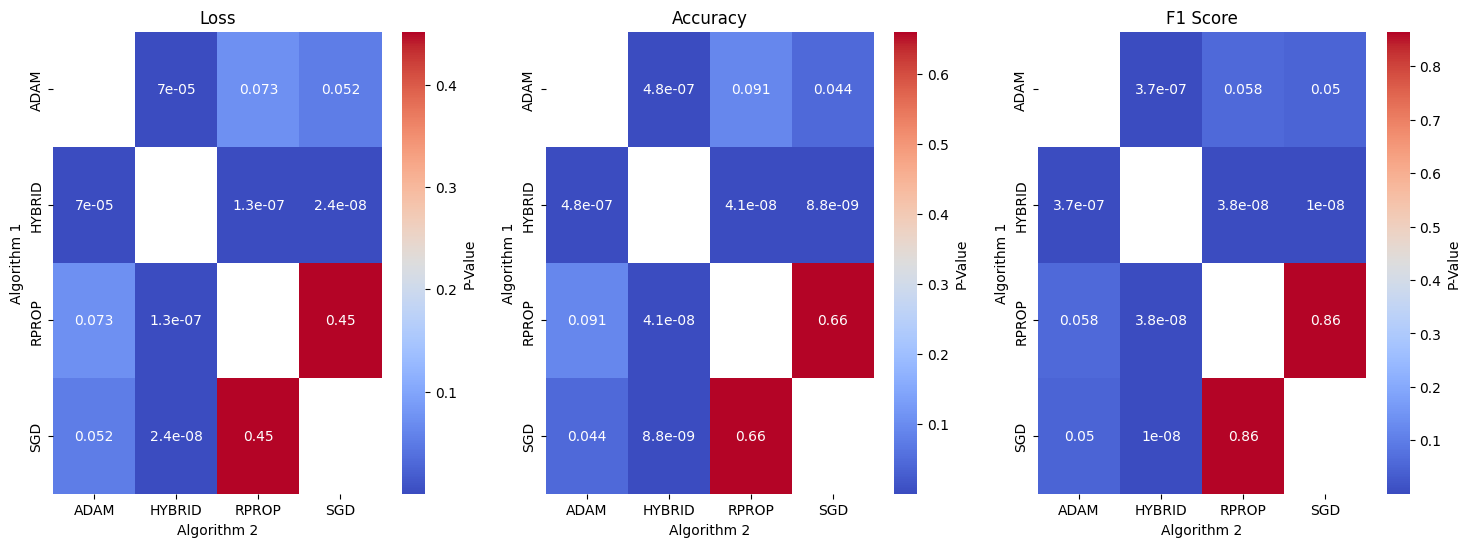

In [66]:
algorithms = ["SGD", "ADAM", "RPROP", "HYBRID"]

loss_p_values = []
accuracy_p_values = []
f1_score_p_values = []
algo1 = []
algo2 = []

for i in range(0, len(algorithms)):
    for j in range(0, len(algorithms)):
        algo1.append(algorithms[i])
        algo2.append(algorithms[j])
        loss_p_values.append(stats.ttest_rel(TEST_RESULTS[algorithms[i]]["losses"], TEST_RESULTS[algorithms[j]]["losses"]).pvalue)
        accuracy_p_values.append(stats.ttest_rel(TEST_RESULTS[algorithms[i]]["accuracies"], TEST_RESULTS[algorithms[j]]["accuracies"]).pvalue)
        f1_score_p_values.append(stats.ttest_rel(TEST_RESULTS[algorithms[i]]["f1_scores"], TEST_RESULTS[algorithms[j]]["f1_scores"]).pvalue)
        print(f"{algorithms[i]} vs {algorithms[j]}")
        print(f"Loss: {loss_p_values[-1]}")
        print(f"Accuracy: {accuracy_p_values[-1]}")
        print(f"F1 Score: {f1_score_p_values[-1]}")
        
        
        
df_loss_p_values = pd.DataFrame({'Algorithm 1': algo1, 
                        'Algorithm 2': algo2, 
                        'P-Value': loss_p_values})

df_accuracy_p_values = pd.DataFrame({'Algorithm 1': algo1,
                        'Algorithm 2': algo2,
                        'P-Value': accuracy_p_values})

df_f1_score_p_values = pd.DataFrame({'Algorithm 1': algo1,
                        'Algorithm 2': algo2,
                        'P-Value': f1_score_p_values})
                                

# Pivot the data to create a grid for heatmap
heatmap_data_loss_p_values = df_loss_p_values.pivot(index="Algorithm 1", columns="Algorithm 2", values="P-Value")
heatmap_data_accuracy_p_values = df_accuracy_p_values.pivot(index="Algorithm 1", columns="Algorithm 2", values="P-Value")
heatmap_data_f1_score_p_values = df_f1_score_p_values.pivot(index="Algorithm 1", columns="Algorithm 2", values="P-Value")

# Plot the heatmaps on the same figure
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.heatmap(heatmap_data_loss_p_values, annot=True, cmap="coolwarm", cbar_kws={'label': 'P-Value'})
plt.title("Loss")
plt.subplot(1, 3, 2)
sns.heatmap(heatmap_data_accuracy_p_values, annot=True, cmap="coolwarm", cbar_kws={'label': 'P-Value'})
plt.title("Accuracy")
plt.subplot(1, 3, 3)
sns.heatmap(heatmap_data_f1_score_p_values, annot=True, cmap="coolwarm", cbar_kws={'label': 'P-Value'})
plt.title("F1 Score")

## Training vs Test Performance

In [67]:
example_sgd_trial = SGD_TRIALS[-1]
example_sgd_trial_training_losses = example_sgd_trial["training_losses"]
example_sgd_trial_training_accuracies = example_sgd_trial["training_accuracies"]
example_sgd_trial_training_f1_scores = example_sgd_trial["training_f1_scores"]
example_sgd_trial_testing_losses = example_sgd_trial["testing_losses"]
example_sgd_trial_testing_accuracies = example_sgd_trial["testing_accuracies"]
example_sgd_trial_testing_f1_scores = example_sgd_trial["testing_f1_scores"]

example_adam_trial = ADAM_TRIALS[-1]
example_adam_trial_training_losses = example_adam_trial["training_losses"]
example_adam_trial_training_accuracies = example_adam_trial["training_accuracies"]
example_adam_trial_training_f1_scores = example_adam_trial["training_f1_scores"]
example_adam_trial_testing_losses = example_adam_trial["testing_losses"]
example_adam_trial_testing_accuracies = example_adam_trial["testing_accuracies"]
example_adam_trial_testing_f1_scores = example_adam_trial["testing_f1_scores"]

example_rprop_trial = RPROP_TRIALS[-1]
example_rprop_trial_training_losses = example_rprop_trial["training_losses"]
example_rprop_trial_training_accuracies = example_rprop_trial["training_accuracies"]
example_rprop_trial_training_f1_scores = example_rprop_trial["training_f1_scores"]
example_rprop_trial_testing_losses = example_rprop_trial["testing_losses"]
example_rprop_trial_testing_accuracies = example_rprop_trial["testing_accuracies"]
example_rprop_trial_testing_f1_scores = example_rprop_trial["testing_f1_scores"]

example_hybrid_trial = HYBRID_TRIALS[-1]
example_hybrid_trial_training_losses = example_hybrid_trial["training_losses"]
example_hybrid_trial_training_accuracies = example_hybrid_trial["training_accuracies"]
example_hybrid_trial_training_f1_scores = example_hybrid_trial["training_f1_scores"]
example_hybrid_trial_testing_losses = example_hybrid_trial["testing_losses"]
example_hybrid_trial_testing_accuracies = example_hybrid_trial["testing_accuracies"]
example_hybrid_trial_testing_f1_scores = example_hybrid_trial["testing_f1_scores"]

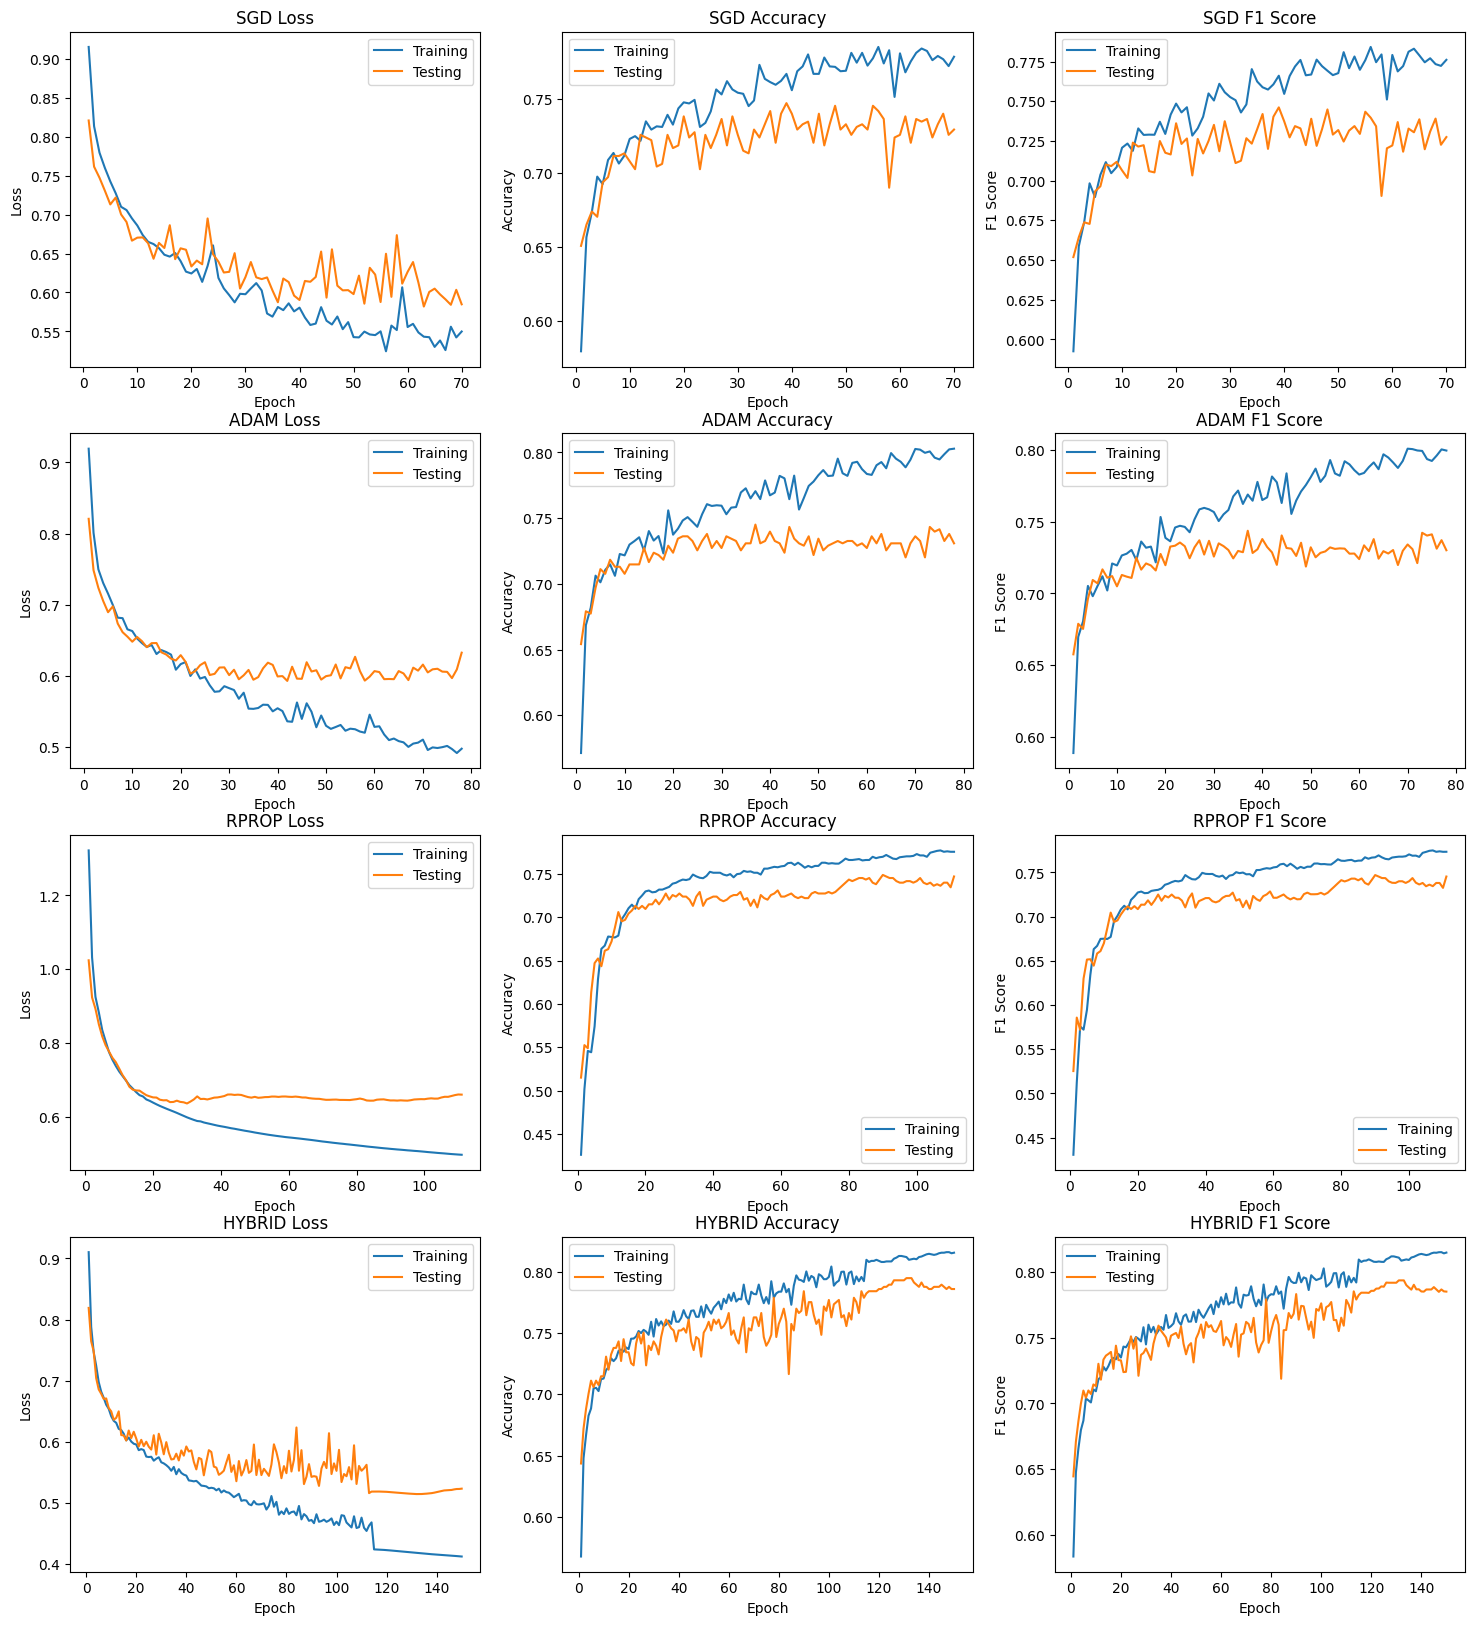

In [68]:
# Plot test results vs training results per algorithm, per metrics, all on the same figure
plt.figure(figsize=(18, 20))

# SGD
# Plot Loss over epochs for training and testing
plt.subplot(4, 3, 1)
plt.plot(range(1, len(example_sgd_trial_training_losses) + 1), example_sgd_trial_training_losses, label="Training")
plt.plot(range(1, len(example_sgd_trial_testing_losses) + 1), example_sgd_trial_testing_losses, label="Testing")
plt.title("SGD Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Plot Accuracy over epochs for training and testing
plt.subplot(4, 3, 2)
plt.plot(range(1, len(example_sgd_trial_training_accuracies) + 1), example_sgd_trial_training_accuracies, label="Training")
plt.plot(range(1, len(example_sgd_trial_testing_accuracies) + 1), example_sgd_trial_testing_accuracies, label="Testing")
plt.title("SGD Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Plot F1 Score over epochs for training and testing
plt.subplot(4, 3, 3)
plt.plot(range(1, len(example_sgd_trial_training_f1_scores) + 1), example_sgd_trial_training_f1_scores, label="Training")
plt.plot(range(1, len(example_sgd_trial_testing_f1_scores) + 1), example_sgd_trial_testing_f1_scores, label="Testing")
plt.title("SGD F1 Score")
plt.xlabel("Epoch")
plt.ylabel("F1 Score")
plt.legend()


# ADAM
# Plot Loss over epochs for training and testing
plt.subplot(4, 3, 4)
plt.plot(range(1, len(example_adam_trial_training_losses) + 1), example_adam_trial_training_losses, label="Training")
plt.plot(range(1, len(example_adam_trial_testing_losses) + 1), example_adam_trial_testing_losses, label="Testing")
plt.title("ADAM Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Plot Accuracy over epochs for training and testing
plt.subplot(4, 3, 5)
plt.plot(range(1, len(example_adam_trial_training_accuracies) + 1), example_adam_trial_training_accuracies, label="Training")
plt.plot(range(1, len(example_adam_trial_testing_accuracies) + 1), example_adam_trial_testing_accuracies, label="Testing")
plt.title("ADAM Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Plot F1 Score over epochs for training and testing
plt.subplot(4, 3, 6)
plt.plot(range(1, len(example_adam_trial_training_f1_scores) + 1), example_adam_trial_training_f1_scores, label="Training") 
plt.plot(range(1, len(example_adam_trial_testing_f1_scores) + 1), example_adam_trial_testing_f1_scores, label="Testing")
plt.title("ADAM F1 Score")
plt.xlabel("Epoch")
plt.ylabel("F1 Score")
plt.legend()

# RPROP
# Plot Loss over epochs for training and testing
plt.subplot(4, 3, 7)
plt.plot(range(1, len(example_rprop_trial_training_losses) + 1), example_rprop_trial_training_losses, label="Training")
plt.plot(range(1, len(example_rprop_trial_testing_losses) + 1), example_rprop_trial_testing_losses, label="Testing")
plt.title("RPROP Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Plot Accuracy over epochs for training and testing
plt.subplot(4, 3, 8)
plt.plot(range(1, len(example_rprop_trial_training_accuracies) + 1), example_rprop_trial_training_accuracies, label="Training")
plt.plot(range(1, len(example_rprop_trial_testing_accuracies) + 1), example_rprop_trial_testing_accuracies, label="Testing")
plt.title("RPROP Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Plot F1 Score over epochs for training and testing
plt.subplot(4, 3, 9)
plt.plot(range(1, len(example_rprop_trial_training_f1_scores) + 1), example_rprop_trial_training_f1_scores, label="Training")
plt.plot(range(1, len(example_rprop_trial_testing_f1_scores) + 1), example_rprop_trial_testing_f1_scores, label="Testing")
plt.title("RPROP F1 Score")
plt.xlabel("Epoch")
plt.ylabel("F1 Score")
plt.legend()

# HYBRID
# Plot Loss over epochs for training and testing
plt.subplot(4, 3, 10)
plt.plot(range(1, len(example_hybrid_trial_training_losses) + 1), example_hybrid_trial_training_losses, label="Training")
plt.plot(range(1, len(example_hybrid_trial_testing_losses) + 1), example_hybrid_trial_testing_losses, label="Testing")
plt.title("HYBRID Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Plot Accuracy over epochs for training and testing
plt.subplot(4, 3, 11)
plt.plot(range(1, len(example_hybrid_trial_training_accuracies) + 1), example_hybrid_trial_training_accuracies, label="Training")
plt.plot(range(1, len(example_hybrid_trial_testing_accuracies) + 1), example_hybrid_trial_testing_accuracies, label="Testing")
plt.title("HYBRID Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Plot F1 Score over epochs for training and testing
plt.subplot(4, 3, 12)
plt.plot(range(1, len(example_hybrid_trial_training_f1_scores) + 1), example_hybrid_trial_training_f1_scores, label="Training")
plt.plot(range(1, len(example_hybrid_trial_testing_f1_scores) + 1), example_hybrid_trial_testing_f1_scores, label="Testing")
plt.title("HYBRID F1 Score")
plt.xlabel("Epoch")
plt.ylabel("F1 Score")
plt.legend()


## Algorithms vs Each Other

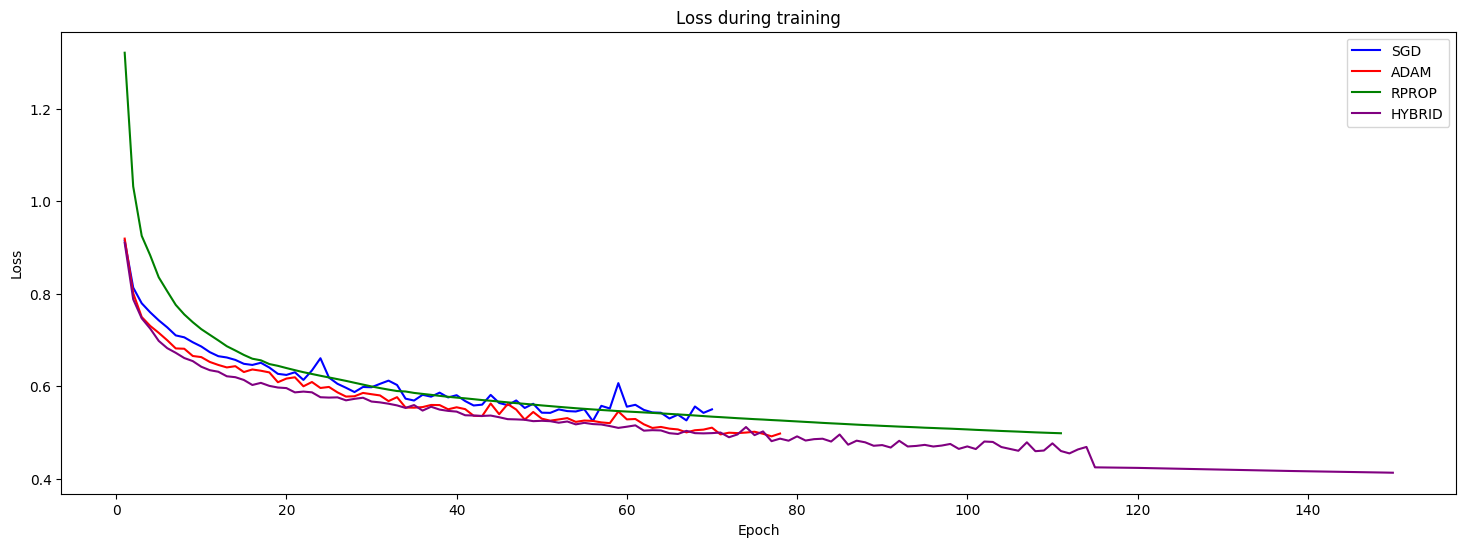

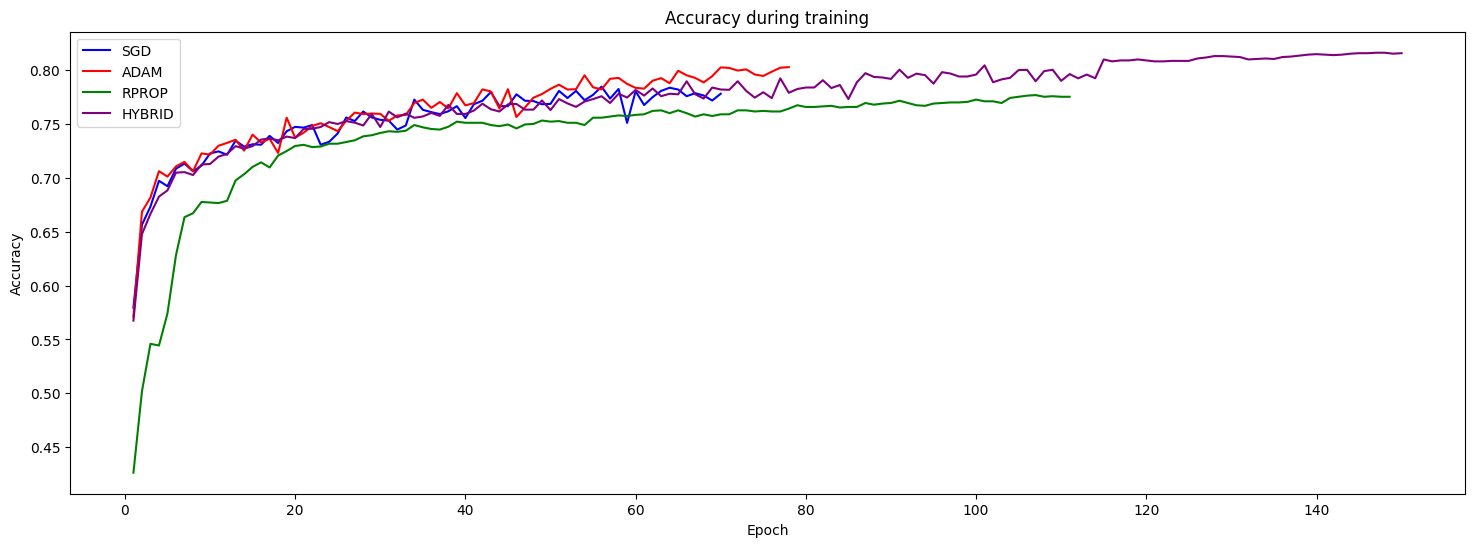

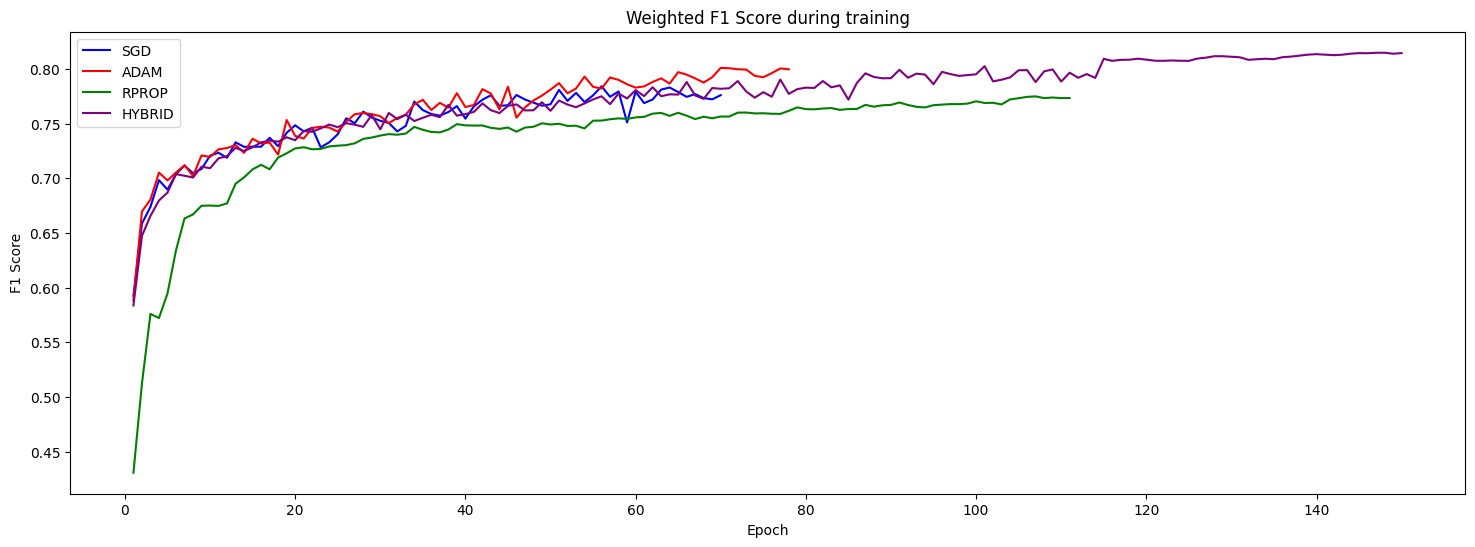

In [69]:
# Create 3 plots on the same figure for each metric, comparing the 4 algorithms (based on training data)
# SGD = blue
# ADAM = red
# RPROP = green
# HYBRID = purple

plt.figure(figsize=(18, 6))
plt.plot(range(1, len(example_sgd_trial_training_losses) + 1), example_sgd_trial_training_losses, label="SGD", color="blue")
plt.plot(range(1, len(example_adam_trial_training_losses) + 1), example_adam_trial_training_losses, label="ADAM", color="red")
plt.plot(range(1, len(example_rprop_trial_training_losses) + 1), example_rprop_trial_training_losses, label="RPROP", color="green")
plt.plot(range(1, len(example_hybrid_trial_training_losses) + 1), example_hybrid_trial_training_losses, label="HYBRID", color="purple")
plt.title("Loss during training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.figure(figsize=(18, 6))
plt.plot(range(1, len(example_sgd_trial_training_accuracies) + 1), example_sgd_trial_training_accuracies, label="SGD", color="blue")
plt.plot(range(1, len(example_adam_trial_training_accuracies) + 1), example_adam_trial_training_accuracies, label="ADAM", color="red")
plt.plot(range(1, len(example_rprop_trial_training_accuracies) + 1), example_rprop_trial_training_accuracies, label="RPROP", color="green")
plt.plot(range(1, len(example_hybrid_trial_training_accuracies) + 1), example_hybrid_trial_training_accuracies, label="HYBRID", color="purple")
plt.title("Accuracy during training")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.figure(figsize=(18, 6))
plt.plot(range(1, len(example_sgd_trial_training_f1_scores) + 1), example_sgd_trial_training_f1_scores, label="SGD", color="blue")
plt.plot(range(1, len(example_adam_trial_training_f1_scores) + 1), example_adam_trial_training_f1_scores, label="ADAM", color="red")
plt.plot(range(1, len(example_rprop_trial_training_f1_scores) + 1), example_rprop_trial_training_f1_scores, label="RPROP", color="green")
plt.plot(range(1, len(example_hybrid_trial_training_f1_scores) + 1), example_hybrid_trial_training_f1_scores, label="HYBRID", color="purple")
plt.title("Weighted F1 Score during training")
plt.xlabel("Epoch")
plt.ylabel("F1 Score")
plt.legend()

## Additional Plots of Loss Over Epochs

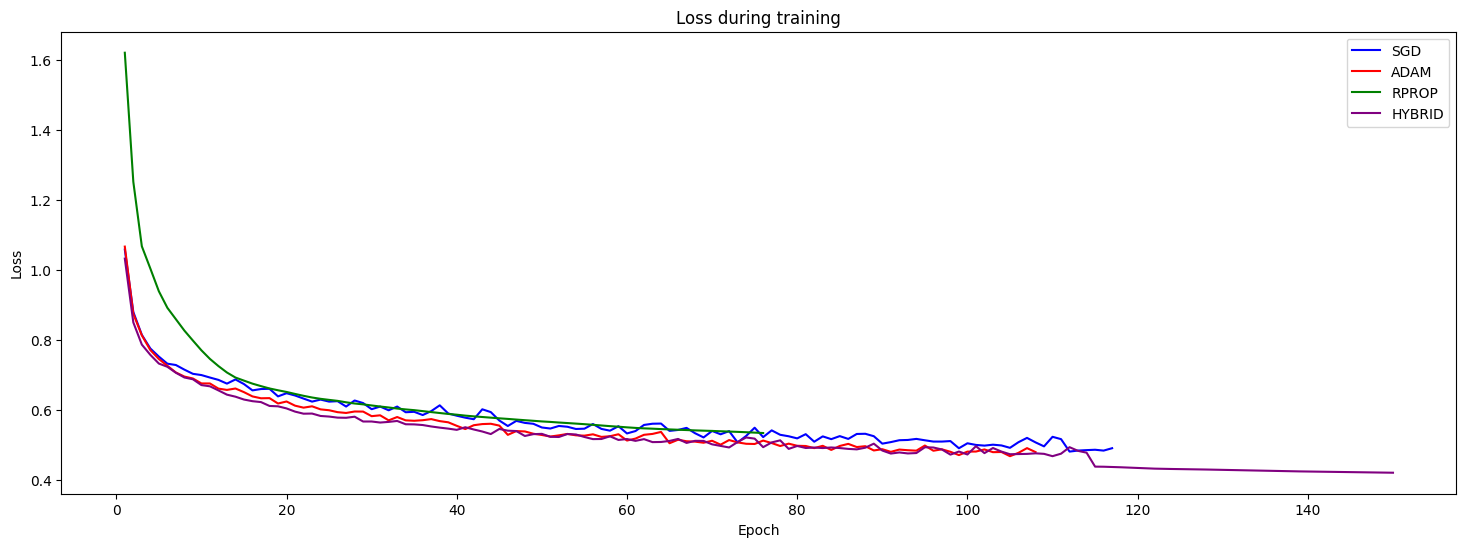

In [70]:
example_sgd_trial = SGD_TRIALS[0]
example_sgd_trial_training_losses = example_sgd_trial["training_losses"]
example_sgd_trial_training_accuracies = example_sgd_trial["training_accuracies"]
example_sgd_trial_training_f1_scores = example_sgd_trial["training_f1_scores"]
example_sgd_trial_testing_losses = example_sgd_trial["testing_losses"]
example_sgd_trial_testing_accuracies = example_sgd_trial["testing_accuracies"]
example_sgd_trial_testing_f1_scores = example_sgd_trial["testing_f1_scores"]

example_adam_trial = ADAM_TRIALS[0]
example_adam_trial_training_losses = example_adam_trial["training_losses"]
example_adam_trial_training_accuracies = example_adam_trial["training_accuracies"]
example_adam_trial_training_f1_scores = example_adam_trial["training_f1_scores"]
example_adam_trial_testing_losses = example_adam_trial["testing_losses"]
example_adam_trial_testing_accuracies = example_adam_trial["testing_accuracies"]
example_adam_trial_testing_f1_scores = example_adam_trial["testing_f1_scores"]

example_rprop_trial = RPROP_TRIALS[0]
example_rprop_trial_training_losses = example_rprop_trial["training_losses"]
example_rprop_trial_training_accuracies = example_rprop_trial["training_accuracies"]
example_rprop_trial_training_f1_scores = example_rprop_trial["training_f1_scores"]
example_rprop_trial_testing_losses = example_rprop_trial["testing_losses"]
example_rprop_trial_testing_accuracies = example_rprop_trial["testing_accuracies"]
example_rprop_trial_testing_f1_scores = example_rprop_trial["testing_f1_scores"]

example_hybrid_trial = HYBRID_TRIALS[0]
example_hybrid_trial_training_losses = example_hybrid_trial["training_losses"]
example_hybrid_trial_training_accuracies = example_hybrid_trial["training_accuracies"]
example_hybrid_trial_training_f1_scores = example_hybrid_trial["training_f1_scores"]
example_hybrid_trial_testing_losses = example_hybrid_trial["testing_losses"]
example_hybrid_trial_testing_accuracies = example_hybrid_trial["testing_accuracies"]
example_hybrid_trial_testing_f1_scores = example_hybrid_trial["testing_f1_scores"]


plt.figure(figsize=(18, 6))
plt.plot(range(1, len(example_sgd_trial_training_losses) + 1), example_sgd_trial_training_losses, label="SGD", color="blue")
plt.plot(range(1, len(example_adam_trial_training_losses) + 1), example_adam_trial_training_losses, label="ADAM", color="red")
plt.plot(range(1, len(example_rprop_trial_training_losses) + 1), example_rprop_trial_training_losses, label="RPROP", color="green")
plt.plot(range(1, len(example_hybrid_trial_training_losses) + 1), example_hybrid_trial_training_losses, label="HYBRID", color="purple")
plt.title("Loss during training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

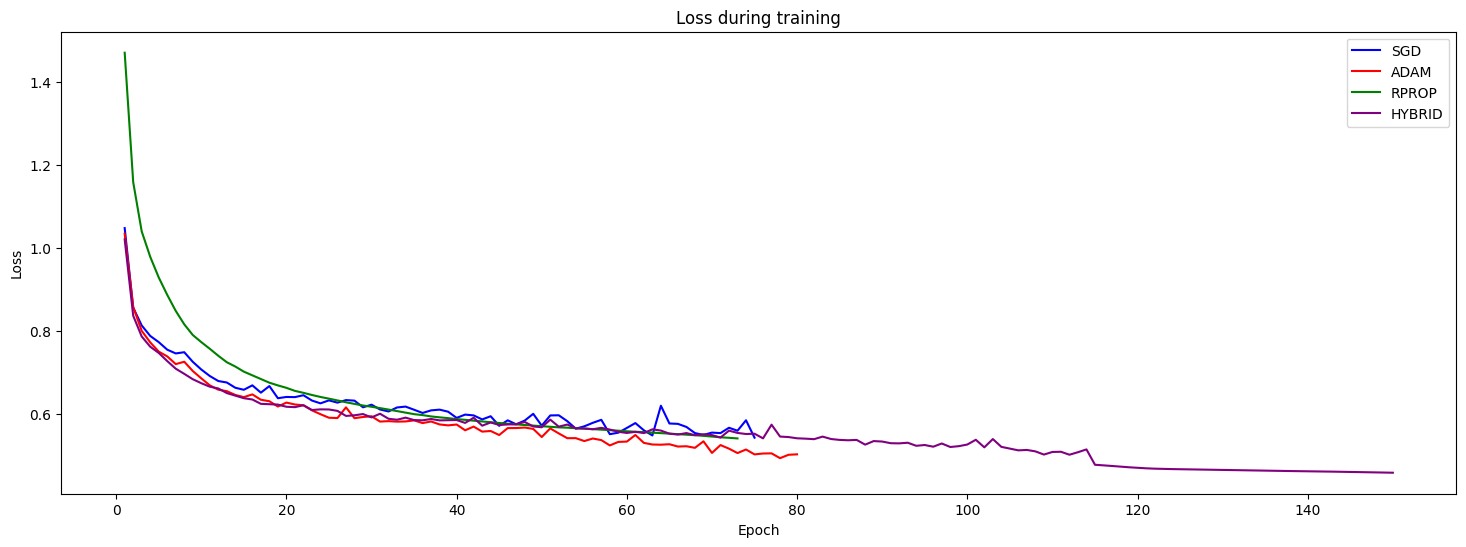

In [71]:
example_sgd_trial = SGD_TRIALS[5]
example_sgd_trial_training_losses = example_sgd_trial["training_losses"]
example_sgd_trial_training_accuracies = example_sgd_trial["training_accuracies"]
example_sgd_trial_training_f1_scores = example_sgd_trial["training_f1_scores"]
example_sgd_trial_testing_losses = example_sgd_trial["testing_losses"]
example_sgd_trial_testing_accuracies = example_sgd_trial["testing_accuracies"]
example_sgd_trial_testing_f1_scores = example_sgd_trial["testing_f1_scores"]

example_adam_trial = ADAM_TRIALS[5]
example_adam_trial_training_losses = example_adam_trial["training_losses"]
example_adam_trial_training_accuracies = example_adam_trial["training_accuracies"]
example_adam_trial_training_f1_scores = example_adam_trial["training_f1_scores"]
example_adam_trial_testing_losses = example_adam_trial["testing_losses"]
example_adam_trial_testing_accuracies = example_adam_trial["testing_accuracies"]
example_adam_trial_testing_f1_scores = example_adam_trial["testing_f1_scores"]

example_rprop_trial = RPROP_TRIALS[5]
example_rprop_trial_training_losses = example_rprop_trial["training_losses"]
example_rprop_trial_training_accuracies = example_rprop_trial["training_accuracies"]
example_rprop_trial_training_f1_scores = example_rprop_trial["training_f1_scores"]
example_rprop_trial_testing_losses = example_rprop_trial["testing_losses"]
example_rprop_trial_testing_accuracies = example_rprop_trial["testing_accuracies"]
example_rprop_trial_testing_f1_scores = example_rprop_trial["testing_f1_scores"]

example_hybrid_trial = HYBRID_TRIALS[5]
example_hybrid_trial_training_losses = example_hybrid_trial["training_losses"]
example_hybrid_trial_training_accuracies = example_hybrid_trial["training_accuracies"]
example_hybrid_trial_training_f1_scores = example_hybrid_trial["training_f1_scores"]
example_hybrid_trial_testing_losses = example_hybrid_trial["testing_losses"]
example_hybrid_trial_testing_accuracies = example_hybrid_trial["testing_accuracies"]
example_hybrid_trial_testing_f1_scores = example_hybrid_trial["testing_f1_scores"]


plt.figure(figsize=(18, 6))
plt.plot(range(1, len(example_sgd_trial_training_losses) + 1), example_sgd_trial_training_losses, label="SGD", color="blue")
plt.plot(range(1, len(example_adam_trial_training_losses) + 1), example_adam_trial_training_losses, label="ADAM", color="red")
plt.plot(range(1, len(example_rprop_trial_training_losses) + 1), example_rprop_trial_training_losses, label="RPROP", color="green")
plt.plot(range(1, len(example_hybrid_trial_training_losses) + 1), example_hybrid_trial_training_losses, label="HYBRID", color="purple")
plt.title("Loss during training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

## Analysis of Num Epochs

In [72]:
num_epochs_for_sgd = [x["num_epochs"] for x in SGD_TRIALS]
num_epochs_for_adam = [x["num_epochs"] for x in ADAM_TRIALS]
num_epochs_for_rprop = [x["num_epochs"] for x in RPROP_TRIALS]
num_epochs_for_hybrid = [x["num_epochs"] for x in HYBRID_TRIALS]

print("SGD")
print("\tMean: ", np.mean(num_epochs_for_sgd))
print("\tStandard Deviation: ", np.std(num_epochs_for_sgd))

print("ADAM")
print("\tMean: ", np.mean(num_epochs_for_adam))
print("\tStandard Deviation: ", np.std(num_epochs_for_adam))

print("RPROP")
print("\tMean: ", np.mean(num_epochs_for_rprop))
print("\tStandard Deviation: ", np.std(num_epochs_for_rprop))

print("HYBRID")
print("\tMean: ", np.mean(num_epochs_for_hybrid))
print("\tStandard Deviation: ", np.std(num_epochs_for_hybrid))

print()
# Statistical tests
print("Statistical Tests")
epochs_lists = {
    "sgd" : num_epochs_for_sgd,
    "adam" : num_epochs_for_adam,
    "rprop" : num_epochs_for_rprop,
    "hybrid" : num_epochs_for_hybrid
}

for algo1, a in epochs_lists.items():
    for algo2, b in epochs_lists.items():
        print(f"{algo1} vs {algo2}")
        print("\t"+str(stats.ttest_rel(a, b).pvalue))


SGD
	Mean:  83.68
	Standard Deviation:  15.13597040166239
ADAM
	Mean:  80.56
	Standard Deviation:  13.798782554993755
RPROP
	Mean:  91.76
	Standard Deviation:  28.55770298886099
HYBRID
	Mean:  150.0
	Standard Deviation:  0.0

Statistical Tests
sgd vs sgd
	nan
sgd vs adam
	0.3621785333006784
sgd vs rprop
	0.2730493537750697
sgd vs hybrid
	3.577902899007343e-17
adam vs sgd
	0.3621785333006784
adam vs adam
	nan
adam vs rprop
	0.11232073552944274
adam vs hybrid
	1.4817578676696817e-18
rprop vs sgd
	0.2730493537750697
rprop vs adam
	0.11232073552944274
rprop vs rprop
	nan
rprop vs hybrid
	5.003897041639818e-10
hybrid vs sgd
	3.577902899007343e-17
hybrid vs adam
	1.4817578676696817e-18
hybrid vs rprop
	5.003897041639818e-10
hybrid vs hybrid
	nan
